In [1]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1] (easier to work with)
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time don't work with the entire dataset.
x_train = x_train[:10000]
y_train = x_train[:10000]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

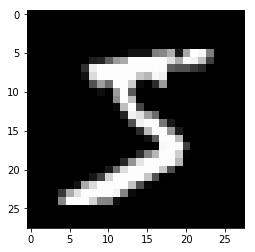

In [3]:
# Plot out a sample image (reshaped to 28 x 28)
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100 # Feel free to tweak this and see what changes

def generator():
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(Dense(256, input_dim=NOISE_DIM, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(784, activation='tanh')) #-1 to 1
    return model
    
    ###################################

In [5]:
def discriminator():
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(Dense(512, input_dim=784))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))#0 to 1
    return model
    ###################################

In [9]:
def combine(generator, discriminator):
    ###################################
    # TODO: Implement
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
    ###################################

In [15]:
# Compile the discriminator, generator, and full GAN. 

# Use this optimizer for each of the models
opt = Adam(lr=.0002, beta_1=0.5)

d = discriminator()
d.compile(loss='binary_crossentropy', optimizer=opt)

g=generator()
g.compile(loss='binary_crossentropy', optimizer=opt)
#############################################
# TODO: Compile generator and discriminator
dg = combine(g, d)
dg.compile(loss='binary_crossentropy', optimizer=opt)
#############################################

In [16]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


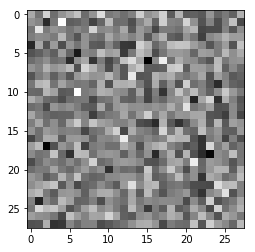

Number batches 78
0(0/78) D: 0.9343, G: 0.7116
0(1/78) D: 0.6230, G: 0.6795
0(2/78) D: 0.4777, G: 0.6469
0(3/78) D: 0.4349, G: 0.6141
0(4/78) D: 0.4376, G: 0.5753
0(5/78) D: 0.4538, G: 0.5362
0(6/78) D: 0.4846, G: 0.5023
0(7/78) D: 0.5168, G: 0.4809
0(8/78) D: 0.5339, G: 0.4546
0(9/78) D: 0.5597, G: 0.4470
0(10/78) D: 0.5791, G: 0.4574
0(11/78) D: 0.5687, G: 0.4916
0(12/78) D: 0.5566, G: 0.5338
0(13/78) D: 0.5325, G: 0.6021
0(14/78) D: 0.5040, G: 0.6776
0(15/78) D: 0.4837, G: 0.7242
0(16/78) D: 0.4596, G: 0.7553
0(17/78) D: 0.4569, G: 0.7690
0(18/78) D: 0.4662, G: 0.7554
0(19/78) D: 0.4558, G: 0.7614
0(20/78) D: 0.4765, G: 0.7567
0(21/78) D: 0.4709, G: 0.7919
0(22/78) D: 0.4658, G: 0.8246
0(23/78) D: 0.4698, G: 0.8077
0(24/78) D: 0.4738, G: 0.8289
0(25/78) D: 0.4763, G: 0.7786
0(26/78) D: 0.4961, G: 0.7711
0(27/78) D: 0.4916, G: 0.7746
0(28/78) D: 0.4947, G: 0.7791
0(29/78) D: 0.4824, G: 0.7821
0(30/78) D: 0.4709, G: 0.8446
0(31/78) D: 0.4446, G: 0.8779
0(32/78) D: 0.4387, G: 0.9043
0(

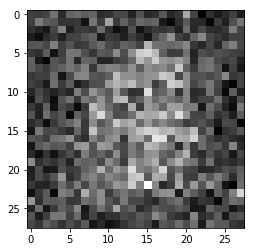

Number batches 78
1(0/78) D: 0.5512, G: 0.9180
1(1/78) D: 0.4641, G: 1.1159
1(2/78) D: 0.4673, G: 1.0052
1(3/78) D: 0.5019, G: 1.1097
1(4/78) D: 0.5490, G: 1.0919
1(5/78) D: 0.6252, G: 0.5857
1(6/78) D: 0.7298, G: 0.8190
1(7/78) D: 0.6578, G: 0.8266
1(8/78) D: 0.6596, G: 0.7118
1(9/78) D: 0.6323, G: 0.9098
1(10/78) D: 0.5304, G: 1.0567
1(11/78) D: 0.5113, G: 0.9192
1(12/78) D: 0.4977, G: 1.0710
1(13/78) D: 0.5151, G: 1.0673
1(14/78) D: 0.5187, G: 0.9812
1(15/78) D: 0.5455, G: 1.1068
1(16/78) D: 0.5497, G: 0.9869
1(17/78) D: 0.5597, G: 0.9713
1(18/78) D: 0.5550, G: 0.9596
1(19/78) D: 0.5538, G: 0.9041
1(20/78) D: 0.5403, G: 0.9053
1(21/78) D: 0.5120, G: 0.9324
1(22/78) D: 0.5229, G: 0.9368
1(23/78) D: 0.4751, G: 1.0815
1(24/78) D: 0.4247, G: 1.1269
1(25/78) D: 0.4101, G: 1.1765
1(26/78) D: 0.4298, G: 1.0581
1(27/78) D: 0.4602, G: 1.1079
1(28/78) D: 0.4463, G: 1.0851
1(29/78) D: 0.4721, G: 0.9864
1(30/78) D: 0.5094, G: 0.9567
1(31/78) D: 0.5195, G: 1.0884
1(32/78) D: 0.5510, G: 0.7623
1(

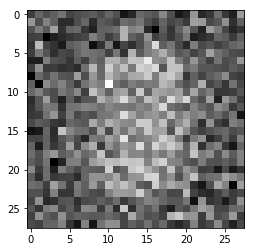

Number batches 78
2(0/78) D: 0.3750, G: 1.3298
2(1/78) D: 0.3838, G: 1.3996
2(2/78) D: 0.3859, G: 1.2238
2(3/78) D: 0.3846, G: 1.3377
2(4/78) D: 0.4038, G: 1.1964
2(5/78) D: 0.4488, G: 1.3001
2(6/78) D: 0.4639, G: 1.1626
2(7/78) D: 0.4610, G: 1.0661
2(8/78) D: 0.4412, G: 1.3616
2(9/78) D: 0.3546, G: 1.4344
2(10/78) D: 0.3719, G: 1.2839
2(11/78) D: 0.3472, G: 1.3152
2(12/78) D: 0.3826, G: 1.4689
2(13/78) D: 0.3881, G: 1.1425
2(14/78) D: 0.4289, G: 1.2974
2(15/78) D: 0.4375, G: 1.1630
2(16/78) D: 0.4362, G: 1.1559
2(17/78) D: 0.3899, G: 1.2874
2(18/78) D: 0.3355, G: 1.3727
2(19/78) D: 0.3245, G: 1.4432
2(20/78) D: 0.3676, G: 1.4067
2(21/78) D: 0.4223, G: 1.2974
2(22/78) D: 0.4611, G: 1.3398
2(23/78) D: 0.5433, G: 0.6936
2(24/78) D: 0.6299, G: 1.2006
2(25/78) D: 0.4698, G: 1.2177
2(26/78) D: 0.3885, G: 1.4095
2(27/78) D: 0.3641, G: 1.5208
2(28/78) D: 0.3612, G: 1.6084
2(29/78) D: 0.4078, G: 1.2983
2(30/78) D: 0.4738, G: 1.4174
2(31/78) D: 0.4640, G: 1.0457
2(32/78) D: 0.4570, G: 1.3630
2(

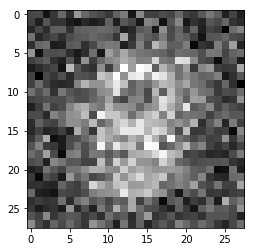

Number batches 78
3(0/78) D: 0.3077, G: 2.1773
3(1/78) D: 0.3758, G: 1.2501
3(2/78) D: 0.3207, G: 1.3260
3(3/78) D: 0.3273, G: 1.9944
3(4/78) D: 0.4017, G: 0.9919
3(5/78) D: 0.4363, G: 1.6103
3(6/78) D: 0.3112, G: 1.9119
3(7/78) D: 0.3187, G: 1.4194
3(8/78) D: 0.3152, G: 1.8450
3(9/78) D: 0.2596, G: 2.0495
3(10/78) D: 0.2372, G: 1.8833
3(11/78) D: 0.2553, G: 2.0887
3(12/78) D: 0.3097, G: 1.4551
3(13/78) D: 0.3648, G: 2.5256
3(14/78) D: 0.3800, G: 0.9420
3(15/78) D: 0.4966, G: 1.9585
3(16/78) D: 0.2252, G: 2.1206
3(17/78) D: 0.2662, G: 1.3979
3(18/78) D: 0.2748, G: 1.6984
3(19/78) D: 0.2402, G: 2.1853
3(20/78) D: 0.2032, G: 2.0944
3(21/78) D: 0.2129, G: 1.7366
3(22/78) D: 0.2529, G: 2.2092
3(23/78) D: 0.2911, G: 1.5223
3(24/78) D: 0.3196, G: 2.3356
3(25/78) D: 0.2326, G: 2.1057
3(26/78) D: 0.2432, G: 2.0120
3(27/78) D: 0.2384, G: 2.4124
3(28/78) D: 0.1879, G: 2.4416
3(29/78) D: 0.2055, G: 1.6468
3(30/78) D: 0.2986, G: 2.5723
3(31/78) D: 0.2220, G: 2.1311
3(32/78) D: 0.1994, G: 1.9959
3(

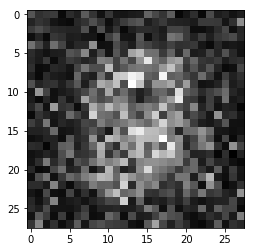

Number batches 78
4(0/78) D: 0.1713, G: 2.6030
4(1/78) D: 0.1763, G: 2.0482
4(2/78) D: 0.2187, G: 2.5562
4(3/78) D: 0.2243, G: 2.2737
4(4/78) D: 0.2332, G: 2.7637
4(5/78) D: 0.1596, G: 3.0305
4(6/78) D: 0.1738, G: 2.4993
4(7/78) D: 0.1826, G: 3.6216
4(8/78) D: 0.2634, G: 1.7264
4(9/78) D: 0.3432, G: 3.2903
4(10/78) D: 0.1311, G: 3.2819
4(11/78) D: 0.1742, G: 2.0026
4(12/78) D: 0.3081, G: 3.0395
4(13/78) D: 0.1884, G: 2.5972
4(14/78) D: 0.1846, G: 2.3148
4(15/78) D: 0.2079, G: 2.9424
4(16/78) D: 0.2178, G: 2.1771
4(17/78) D: 0.2424, G: 2.6055
4(18/78) D: 0.2455, G: 2.1217
4(19/78) D: 0.2073, G: 2.5555
4(20/78) D: 0.1382, G: 2.9185
4(21/78) D: 0.1331, G: 2.7244
4(22/78) D: 0.1454, G: 2.3674
4(23/78) D: 0.2108, G: 2.3803
4(24/78) D: 0.2404, G: 2.4026
4(25/78) D: 0.2307, G: 2.8648
4(26/78) D: 0.1715, G: 3.1755
4(27/78) D: 0.1655, G: 3.1647
4(28/78) D: 0.1573, G: 3.0791
4(29/78) D: 0.1818, G: 3.2050
4(30/78) D: 0.2270, G: 2.8348
4(31/78) D: 0.2305, G: 2.6919
4(32/78) D: 0.2754, G: 2.7902
4(

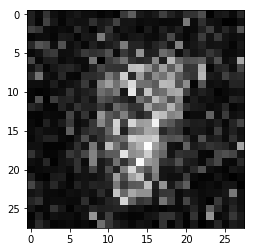

Number batches 78
5(0/78) D: 0.2324, G: 2.2585
5(1/78) D: 0.2365, G: 2.2121
5(2/78) D: 0.2120, G: 2.7515
5(3/78) D: 0.2521, G: 1.9413
5(4/78) D: 0.2954, G: 2.5832
5(5/78) D: 0.2337, G: 2.6057
5(6/78) D: 0.2587, G: 2.2748
5(7/78) D: 0.2661, G: 2.9632
5(8/78) D: 0.2702, G: 1.8095
5(9/78) D: 0.2582, G: 3.1625
5(10/78) D: 0.1644, G: 3.0765
5(11/78) D: 0.2546, G: 1.8093
5(12/78) D: 0.3650, G: 3.4967
5(13/78) D: 0.3064, G: 2.2633
5(14/78) D: 0.2811, G: 3.3819
5(15/78) D: 0.1182, G: 3.8904
5(16/78) D: 0.1624, G: 2.7384
5(17/78) D: 0.2007, G: 2.9853
5(18/78) D: 0.2165, G: 3.6180
5(19/78) D: 0.2056, G: 2.4464
5(20/78) D: 0.2700, G: 3.3509
5(21/78) D: 0.2218, G: 2.9814
5(22/78) D: 0.2041, G: 3.2942
5(23/78) D: 0.2566, G: 2.3504
5(24/78) D: 0.3133, G: 3.7031
5(25/78) D: 0.4144, G: 1.7568
5(26/78) D: 0.4487, G: 3.3738
5(27/78) D: 0.1689, G: 3.5411
5(28/78) D: 0.2617, G: 2.0453
5(29/78) D: 0.2797, G: 2.5544
5(30/78) D: 0.2116, G: 3.1123
5(31/78) D: 0.2393, G: 2.1524
5(32/78) D: 0.2704, G: 2.5909
5(

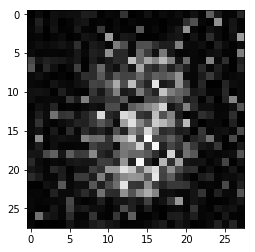

Number batches 78
6(0/78) D: 0.3519, G: 1.6385
6(1/78) D: 0.3382, G: 2.8171
6(2/78) D: 0.3749, G: 1.2983
6(3/78) D: 0.3826, G: 2.9452
6(4/78) D: 0.2880, G: 2.1292
6(5/78) D: 0.2184, G: 2.1739
6(6/78) D: 0.2313, G: 2.5825
6(7/78) D: 0.2006, G: 2.1459
6(8/78) D: 0.2856, G: 2.3978
6(9/78) D: 0.2693, G: 2.6548
6(10/78) D: 0.2828, G: 2.4266
6(11/78) D: 0.3247, G: 1.6694
6(12/78) D: 0.3781, G: 3.3021
6(13/78) D: 0.4070, G: 1.4354
6(14/78) D: 0.3347, G: 2.8281
6(15/78) D: 0.1963, G: 2.9432
6(16/78) D: 0.1991, G: 2.1069
6(17/78) D: 0.2182, G: 2.5943
6(18/78) D: 0.2482, G: 2.3570
6(19/78) D: 0.2604, G: 2.7657
6(20/78) D: 0.2025, G: 2.5914
6(21/78) D: 0.2030, G: 2.8240
6(22/78) D: 0.2194, G: 3.0662
6(23/78) D: 0.2629, G: 2.1152
6(24/78) D: 0.3832, G: 4.3639
6(25/78) D: 0.5912, G: 0.7661
6(26/78) D: 0.7184, G: 3.7370
6(27/78) D: 0.2918, G: 3.0592
6(28/78) D: 0.1543, G: 2.3887
6(29/78) D: 0.2085, G: 2.7671
6(30/78) D: 0.2091, G: 2.7660
6(31/78) D: 0.1931, G: 2.6246
6(32/78) D: 0.2634, G: 2.0215
6(

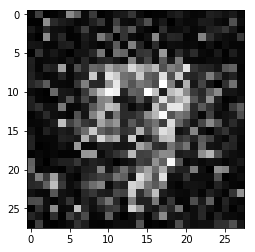

Number batches 78
7(0/78) D: 0.5379, G: 0.9783
7(1/78) D: 0.6371, G: 3.3129
7(2/78) D: 0.3006, G: 2.8329
7(3/78) D: 0.2695, G: 1.6840
7(4/78) D: 0.3676, G: 2.5885
7(5/78) D: 0.3052, G: 2.3645
7(6/78) D: 0.2547, G: 2.4517
7(7/78) D: 0.3460, G: 2.1163
7(8/78) D: 0.4164, G: 1.8158
7(9/78) D: 0.3799, G: 3.4530
7(10/78) D: 0.4418, G: 1.7258
7(11/78) D: 0.4588, G: 2.0125
7(12/78) D: 0.3494, G: 2.6861
7(13/78) D: 0.3175, G: 1.9693
7(14/78) D: 0.3004, G: 2.9714
7(15/78) D: 0.2535, G: 2.6457
7(16/78) D: 0.3228, G: 1.9475
7(17/78) D: 0.3238, G: 3.7239
7(18/78) D: 0.3407, G: 1.4393
7(19/78) D: 0.4277, G: 3.6463
7(20/78) D: 0.3075, G: 2.6369
7(21/78) D: 0.2180, G: 1.7333
7(22/78) D: 0.2909, G: 3.2146
7(23/78) D: 0.2323, G: 2.7069
7(24/78) D: 0.2448, G: 2.2144
7(25/78) D: 0.2842, G: 3.0888
7(26/78) D: 0.3010, G: 1.6833
7(27/78) D: 0.3066, G: 3.0650
7(28/78) D: 0.1801, G: 3.0393
7(29/78) D: 0.2670, G: 1.9769
7(30/78) D: 0.2739, G: 2.5205
7(31/78) D: 0.2322, G: 2.8363
7(32/78) D: 0.2509, G: 2.1351
7(

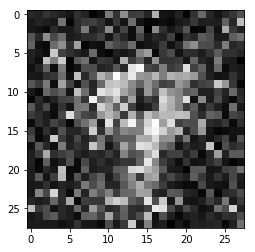

Number batches 78
8(0/78) D: 0.1993, G: 3.7816
8(1/78) D: 0.2734, G: 2.6563
8(2/78) D: 0.3016, G: 4.8442
8(3/78) D: 0.3453, G: 2.2890
8(4/78) D: 0.4261, G: 4.4603
8(5/78) D: 0.2882, G: 2.8059
8(6/78) D: 0.2401, G: 3.3335
8(7/78) D: 0.2274, G: 3.7366
8(8/78) D: 0.2313, G: 3.3122
8(9/78) D: 0.2489, G: 3.8342
8(10/78) D: 0.2906, G: 3.4995
8(11/78) D: 0.3261, G: 2.5652
8(12/78) D: 0.4214, G: 3.6450
8(13/78) D: 0.3469, G: 3.0386
8(14/78) D: 0.3116, G: 3.1019
8(15/78) D: 0.2621, G: 3.3232
8(16/78) D: 0.3136, G: 2.9815
8(17/78) D: 0.4429, G: 2.6564
8(18/78) D: 0.3801, G: 3.6319
8(19/78) D: 0.3717, G: 1.2516
8(20/78) D: 0.5657, G: 4.3137
8(21/78) D: 0.5430, G: 1.7110
8(22/78) D: 0.3810, G: 2.5158
8(23/78) D: 0.2476, G: 2.6607
8(24/78) D: 0.2520, G: 2.4894
8(25/78) D: 0.3375, G: 2.3779
8(26/78) D: 0.3073, G: 2.5807
8(27/78) D: 0.2617, G: 2.3674
8(28/78) D: 0.3279, G: 3.1429
8(29/78) D: 0.3812, G: 1.1219
8(30/78) D: 0.5900, G: 4.0455
8(31/78) D: 0.4420, G: 2.2941
8(32/78) D: 0.3331, G: 1.5917
8(

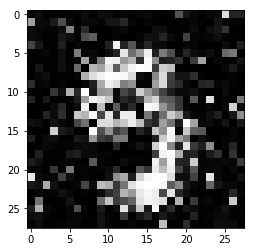

Number batches 78
9(0/78) D: 0.3231, G: 2.5615
9(1/78) D: 0.2812, G: 2.2288
9(2/78) D: 0.2947, G: 2.1010
9(3/78) D: 0.3205, G: 2.2274
9(4/78) D: 0.3478, G: 1.8426
9(5/78) D: 0.3556, G: 2.7993
9(6/78) D: 0.2877, G: 2.0113
9(7/78) D: 0.2920, G: 3.1144
9(8/78) D: 0.3041, G: 1.7892
9(9/78) D: 0.3577, G: 4.2377
9(10/78) D: 0.4036, G: 1.4722
9(11/78) D: 0.5468, G: 3.4979
9(12/78) D: 0.3493, G: 2.3221
9(13/78) D: 0.2255, G: 1.7601
9(14/78) D: 0.2402, G: 2.9090
9(15/78) D: 0.2130, G: 2.6994
9(16/78) D: 0.2258, G: 2.2931
9(17/78) D: 0.2613, G: 2.9207
9(18/78) D: 0.2978, G: 2.6440
9(19/78) D: 0.2973, G: 1.5897
9(20/78) D: 0.3546, G: 4.0989
9(21/78) D: 0.5167, G: 1.0814
9(22/78) D: 0.4612, G: 2.7195
9(23/78) D: 0.2759, G: 2.4397
9(24/78) D: 0.2205, G: 1.8537
9(25/78) D: 0.2546, G: 2.6864
9(26/78) D: 0.1920, G: 2.7949
9(27/78) D: 0.2071, G: 2.3248
9(28/78) D: 0.2562, G: 2.8764
9(29/78) D: 0.1973, G: 2.5431
9(30/78) D: 0.2666, G: 1.8059
9(31/78) D: 0.3047, G: 3.2381
9(32/78) D: 0.2669, G: 1.9811
9(

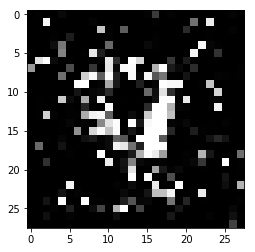

Number batches 78
10(0/78) D: 0.2646, G: 2.2871
10(1/78) D: 0.2257, G: 3.2406
10(2/78) D: 0.3013, G: 2.3502
10(3/78) D: 0.3080, G: 3.3228
10(4/78) D: 0.2396, G: 2.8117
10(5/78) D: 0.2854, G: 3.2732
10(6/78) D: 0.3067, G: 2.5444
10(7/78) D: 0.3353, G: 4.0213
10(8/78) D: 0.4958, G: 1.3406
10(9/78) D: 0.7055, G: 4.7485
10(10/78) D: 0.2951, G: 3.8291
10(11/78) D: 0.3104, G: 1.6085
10(12/78) D: 0.3635, G: 3.1871
10(13/78) D: 0.2053, G: 3.6537
10(14/78) D: 0.2578, G: 2.8720
10(15/78) D: 0.2736, G: 3.1843
10(16/78) D: 0.2623, G: 2.6144
10(17/78) D: 0.2472, G: 3.7477
10(18/78) D: 0.4600, G: 2.1756
10(19/78) D: 0.3856, G: 3.6894
10(20/78) D: 0.3973, G: 3.2951
10(21/78) D: 0.3441, G: 3.3405
10(22/78) D: 0.3861, G: 2.9491
10(23/78) D: 0.4397, G: 2.7580
10(24/78) D: 0.3961, G: 3.3262
10(25/78) D: 0.3321, G: 3.1323
10(26/78) D: 0.3214, G: 3.7141
10(27/78) D: 0.3036, G: 2.5556
10(28/78) D: 0.3550, G: 4.2989
10(29/78) D: 0.4011, G: 1.6720
10(30/78) D: 0.4923, G: 4.3824
10(31/78) D: 0.4826, G: 1.9449


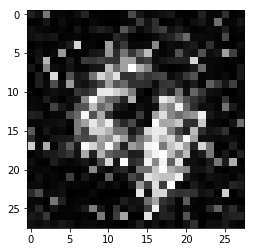

Number batches 78
11(0/78) D: 0.3156, G: 2.5968
11(1/78) D: 0.2988, G: 2.0672
11(2/78) D: 0.3227, G: 2.5433
11(3/78) D: 0.2756, G: 2.3655
11(4/78) D: 0.2967, G: 2.5247
11(5/78) D: 0.2740, G: 2.6511
11(6/78) D: 0.3262, G: 2.6719
11(7/78) D: 0.3388, G: 1.8461
11(8/78) D: 0.3466, G: 2.8825
11(9/78) D: 0.2489, G: 2.4484
11(10/78) D: 0.2749, G: 2.4895
11(11/78) D: 0.3609, G: 2.0901
11(12/78) D: 0.4095, G: 2.3971
11(13/78) D: 0.4206, G: 2.2108
11(14/78) D: 0.3505, G: 2.5357
11(15/78) D: 0.3641, G: 2.1365
11(16/78) D: 0.3255, G: 3.1018
11(17/78) D: 0.4021, G: 2.1936
11(18/78) D: 0.4114, G: 1.6791
11(19/78) D: 0.4302, G: 2.8791
11(20/78) D: 0.4204, G: 1.8775
11(21/78) D: 0.2981, G: 2.5052
11(22/78) D: 0.3383, G: 2.8107
11(23/78) D: 0.3932, G: 1.6794
11(24/78) D: 0.4258, G: 3.2798
11(25/78) D: 0.3734, G: 1.5417
11(26/78) D: 0.4601, G: 3.7040
11(27/78) D: 0.4473, G: 1.4895
11(28/78) D: 0.4275, G: 2.7462
11(29/78) D: 0.2891, G: 2.7806
11(30/78) D: 0.3065, G: 1.8839
11(31/78) D: 0.3908, G: 3.4695


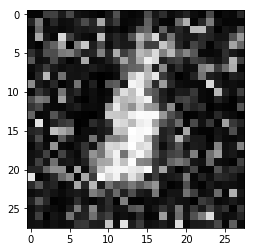

Number batches 78
12(0/78) D: 0.4133, G: 1.9363
12(1/78) D: 0.4483, G: 2.0427
12(2/78) D: 0.3636, G: 2.3352
12(3/78) D: 0.3454, G: 2.0645
12(4/78) D: 0.2966, G: 2.7000
12(5/78) D: 0.3179, G: 2.8463
12(6/78) D: 0.3011, G: 2.1540
12(7/78) D: 0.4010, G: 3.2802
12(8/78) D: 0.4801, G: 1.1941
12(9/78) D: 0.5619, G: 3.8595
12(10/78) D: 0.5065, G: 1.7400
12(11/78) D: 0.4490, G: 1.9789
12(12/78) D: 0.3680, G: 2.5926
12(13/78) D: 0.4004, G: 2.1988
12(14/78) D: 0.4588, G: 2.9516
12(15/78) D: 0.4294, G: 1.8208
12(16/78) D: 0.4595, G: 2.9782
12(17/78) D: 0.4883, G: 2.0237
12(18/78) D: 0.5595, G: 2.2601
12(19/78) D: 0.4583, G: 1.8744
12(20/78) D: 0.4221, G: 2.5721
12(21/78) D: 0.4680, G: 1.8703
12(22/78) D: 0.4647, G: 2.6447
12(23/78) D: 0.3966, G: 2.1625
12(24/78) D: 0.4240, G: 2.1064
12(25/78) D: 0.4408, G: 2.6581
12(26/78) D: 0.3648, G: 2.1505
12(27/78) D: 0.3411, G: 2.9766
12(28/78) D: 0.4405, G: 1.3337
12(29/78) D: 0.5421, G: 3.4200
12(30/78) D: 0.5035, G: 1.3550
12(31/78) D: 0.4578, G: 2.7682


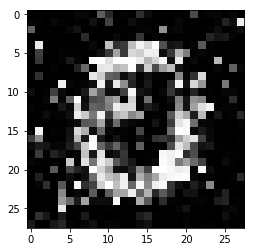

Number batches 78
13(0/78) D: 0.3757, G: 2.2642
13(1/78) D: 0.3512, G: 2.0703
13(2/78) D: 0.4025, G: 2.1901
13(3/78) D: 0.3255, G: 2.2278
13(4/78) D: 0.3188, G: 2.0462
13(5/78) D: 0.3541, G: 3.2740
13(6/78) D: 0.3700, G: 1.3804
13(7/78) D: 0.4779, G: 3.5025
13(8/78) D: 0.4423, G: 1.7130
13(9/78) D: 0.3883, G: 3.0114
13(10/78) D: 0.3081, G: 2.5202
13(11/78) D: 0.3283, G: 1.8576
13(12/78) D: 0.3871, G: 2.8890
13(13/78) D: 0.4280, G: 0.9469
13(14/78) D: 0.5262, G: 3.9451
13(15/78) D: 0.4547, G: 2.2739
13(16/78) D: 0.2998, G: 1.1462
13(17/78) D: 0.3953, G: 2.9907
13(18/78) D: 0.3404, G: 2.2253
13(19/78) D: 0.2875, G: 1.5623
13(20/78) D: 0.2816, G: 2.4807
13(21/78) D: 0.2875, G: 2.0592
13(22/78) D: 0.2669, G: 2.2015
13(23/78) D: 0.2679, G: 2.4062
13(24/78) D: 0.2991, G: 1.7959
13(25/78) D: 0.3543, G: 2.7210
13(26/78) D: 0.2820, G: 1.9733
13(27/78) D: 0.3782, G: 2.1125
13(28/78) D: 0.3025, G: 2.8678
13(29/78) D: 0.3977, G: 1.4457
13(30/78) D: 0.4298, G: 2.5754
13(31/78) D: 0.4075, G: 1.7875


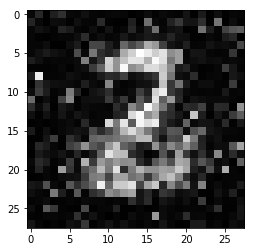

Number batches 78
14(0/78) D: 0.3306, G: 2.4899
14(1/78) D: 0.2896, G: 1.6850
14(2/78) D: 0.3624, G: 2.3452
14(3/78) D: 0.3120, G: 2.5343
14(4/78) D: 0.2907, G: 1.9964
14(5/78) D: 0.3410, G: 2.8525
14(6/78) D: 0.2990, G: 2.7559
14(7/78) D: 0.3096, G: 2.0248
14(8/78) D: 0.3098, G: 3.0955
14(9/78) D: 0.3498, G: 1.6118
14(10/78) D: 0.3680, G: 3.5127
14(11/78) D: 0.3674, G: 2.2198
14(12/78) D: 0.3145, G: 2.0497
14(13/78) D: 0.3316, G: 2.6213
14(14/78) D: 0.3298, G: 2.1569
14(15/78) D: 0.3807, G: 2.6649
14(16/78) D: 0.3695, G: 2.3009
14(17/78) D: 0.4191, G: 1.8791
14(18/78) D: 0.3856, G: 3.2059
14(19/78) D: 0.3219, G: 2.1370
14(20/78) D: 0.3267, G: 2.0021
14(21/78) D: 0.3581, G: 2.1751
14(22/78) D: 0.3470, G: 2.2084
14(23/78) D: 0.3254, G: 2.2731
14(24/78) D: 0.3453, G: 2.0038
14(25/78) D: 0.3045, G: 2.2033
14(26/78) D: 0.3205, G: 1.7454
14(27/78) D: 0.3534, G: 2.5684
14(28/78) D: 0.3597, G: 2.0164
14(29/78) D: 0.3675, G: 2.0259
14(30/78) D: 0.3596, G: 3.0073
14(31/78) D: 0.3210, G: 1.8862


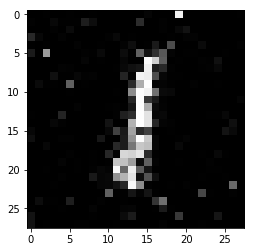

Number batches 78
15(0/78) D: 0.3532, G: 1.7586
15(1/78) D: 0.3930, G: 2.4728
15(2/78) D: 0.3327, G: 2.2894
15(3/78) D: 0.2646, G: 2.7380
15(4/78) D: 0.2908, G: 2.1982
15(5/78) D: 0.2858, G: 2.5441
15(6/78) D: 0.2848, G: 2.2454
15(7/78) D: 0.2666, G: 3.1702
15(8/78) D: 0.3438, G: 1.4814
15(9/78) D: 0.3615, G: 3.0310
15(10/78) D: 0.2600, G: 2.6799
15(11/78) D: 0.2732, G: 2.5844
15(12/78) D: 0.2500, G: 2.1140
15(13/78) D: 0.3142, G: 2.7949
15(14/78) D: 0.2656, G: 1.8719
15(15/78) D: 0.3070, G: 2.6547
15(16/78) D: 0.3149, G: 2.4220
15(17/78) D: 0.3132, G: 2.4232
15(18/78) D: 0.3413, G: 2.3718
15(19/78) D: 0.2737, G: 2.5408
15(20/78) D: 0.2784, G: 2.1178
15(21/78) D: 0.3103, G: 3.1136
15(22/78) D: 0.3766, G: 1.5089
15(23/78) D: 0.3524, G: 3.3766
15(24/78) D: 0.3892, G: 1.2924
15(25/78) D: 0.4076, G: 3.4126
15(26/78) D: 0.3781, G: 2.3485
15(27/78) D: 0.3225, G: 1.3704
15(28/78) D: 0.4127, G: 3.7110
15(29/78) D: 0.3252, G: 2.6951
15(30/78) D: 0.2520, G: 1.6959
15(31/78) D: 0.3007, G: 2.9236


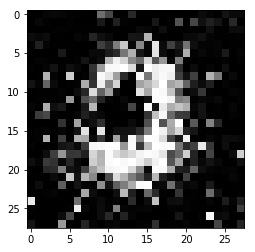

Number batches 78
16(0/78) D: 0.4056, G: 2.2435
16(1/78) D: 0.3684, G: 2.7323
16(2/78) D: 0.3841, G: 2.5274
16(3/78) D: 0.2982, G: 2.6221
16(4/78) D: 0.2852, G: 2.5988
16(5/78) D: 0.2721, G: 2.8235
16(6/78) D: 0.2937, G: 2.6373
16(7/78) D: 0.3314, G: 3.1340
16(8/78) D: 0.3956, G: 1.6430
16(9/78) D: 0.4598, G: 4.0799
16(10/78) D: 0.4262, G: 1.9090
16(11/78) D: 0.4150, G: 4.3342
16(12/78) D: 0.4614, G: 1.2934
16(13/78) D: 0.6407, G: 3.9883
16(14/78) D: 0.5540, G: 1.6707
16(15/78) D: 0.5254, G: 2.5694
16(16/78) D: 0.4511, G: 1.8946
16(17/78) D: 0.4433, G: 2.0888
16(18/78) D: 0.3513, G: 3.2052
16(19/78) D: 0.3335, G: 2.2946
16(20/78) D: 0.3719, G: 2.0122
16(21/78) D: 0.4085, G: 2.5571
16(22/78) D: 0.3737, G: 2.3040
16(23/78) D: 0.3862, G: 2.8196
16(24/78) D: 0.3537, G: 2.0158
16(25/78) D: 0.3781, G: 3.3820
16(26/78) D: 0.3922, G: 1.6253
16(27/78) D: 0.4217, G: 3.0881
16(28/78) D: 0.3544, G: 2.1561
16(29/78) D: 0.3672, G: 2.0787
16(30/78) D: 0.4319, G: 1.7613
16(31/78) D: 0.3803, G: 3.1058


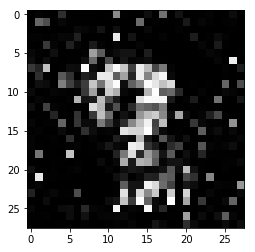

Number batches 78
17(0/78) D: 0.4374, G: 3.2486
17(1/78) D: 0.3895, G: 1.8395
17(2/78) D: 0.3070, G: 2.3961
17(3/78) D: 0.3112, G: 2.7333
17(4/78) D: 0.3223, G: 1.6197
17(5/78) D: 0.3882, G: 2.8839
17(6/78) D: 0.2969, G: 2.5561
17(7/78) D: 0.3071, G: 2.1763
17(8/78) D: 0.4098, G: 1.8845
17(9/78) D: 0.3883, G: 2.6980
17(10/78) D: 0.3458, G: 1.6551
17(11/78) D: 0.3277, G: 2.4514
17(12/78) D: 0.3511, G: 2.1464
17(13/78) D: 0.3136, G: 2.4457
17(14/78) D: 0.3434, G: 2.3613
17(15/78) D: 0.3352, G: 1.5303
17(16/78) D: 0.3397, G: 2.8236
17(17/78) D: 0.3579, G: 1.9472
17(18/78) D: 0.3729, G: 2.2194
17(19/78) D: 0.3632, G: 1.8490
17(20/78) D: 0.3250, G: 3.0049
17(21/78) D: 0.4019, G: 1.2149
17(22/78) D: 0.4120, G: 3.4373
17(23/78) D: 0.4398, G: 1.3786
17(24/78) D: 0.4035, G: 2.2133
17(25/78) D: 0.2942, G: 2.1308
17(26/78) D: 0.2767, G: 1.8535
17(27/78) D: 0.2900, G: 2.2278
17(28/78) D: 0.2632, G: 2.2213
17(29/78) D: 0.2822, G: 2.4039
17(30/78) D: 0.3189, G: 2.2862
17(31/78) D: 0.3279, G: 1.7405


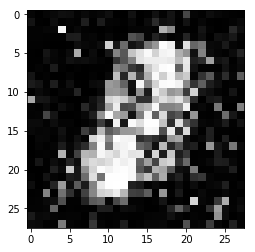

Number batches 78
18(0/78) D: 0.4116, G: 2.8001
18(1/78) D: 0.3968, G: 1.6335
18(2/78) D: 0.3880, G: 2.7798
18(3/78) D: 0.3959, G: 1.7331
18(4/78) D: 0.3920, G: 3.0651
18(5/78) D: 0.4373, G: 1.5820
18(6/78) D: 0.4011, G: 3.4770
18(7/78) D: 0.3680, G: 1.8846
18(8/78) D: 0.3804, G: 1.8741
18(9/78) D: 0.3406, G: 2.8008
18(10/78) D: 0.3503, G: 1.9948
18(11/78) D: 0.3833, G: 2.4712
18(12/78) D: 0.3705, G: 2.2220
18(13/78) D: 0.4168, G: 2.3751
18(14/78) D: 0.2870, G: 2.6281
18(15/78) D: 0.3103, G: 1.9649
18(16/78) D: 0.3529, G: 2.2325
18(17/78) D: 0.2837, G: 3.1933
18(18/78) D: 0.3678, G: 1.5311
18(19/78) D: 0.3608, G: 2.9821
18(20/78) D: 0.3378, G: 1.8709
18(21/78) D: 0.3457, G: 2.8519
18(22/78) D: 0.2546, G: 2.3910
18(23/78) D: 0.2716, G: 2.3560
18(24/78) D: 0.3148, G: 2.0995
18(25/78) D: 0.2937, G: 2.4100
18(26/78) D: 0.3358, G: 2.5152
18(27/78) D: 0.3318, G: 2.1606
18(28/78) D: 0.3327, G: 3.0759
18(29/78) D: 0.3345, G: 2.0724
18(30/78) D: 0.3188, G: 2.9236
18(31/78) D: 0.2622, G: 2.1815


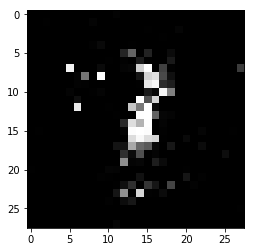

Number batches 78
19(0/78) D: 0.5243, G: 1.4514
19(1/78) D: 0.4211, G: 2.4931
19(2/78) D: 0.3082, G: 2.2582
19(3/78) D: 0.3954, G: 1.4718
19(4/78) D: 0.4122, G: 2.5925
19(5/78) D: 0.3464, G: 2.0209
19(6/78) D: 0.3449, G: 2.3969
19(7/78) D: 0.3415, G: 1.7558
19(8/78) D: 0.4391, G: 2.1485
19(9/78) D: 0.3600, G: 2.6706
19(10/78) D: 0.3565, G: 2.0246
19(11/78) D: 0.3724, G: 1.9756
19(12/78) D: 0.3747, G: 2.4487
19(13/78) D: 0.4014, G: 1.2178
19(14/78) D: 0.4845, G: 3.5532
19(15/78) D: 0.4487, G: 1.7137
19(16/78) D: 0.3701, G: 1.8732
19(17/78) D: 0.3265, G: 2.5386
19(18/78) D: 0.3501, G: 1.7500
19(19/78) D: 0.3736, G: 2.1160
19(20/78) D: 0.3226, G: 2.2664
19(21/78) D: 0.3488, G: 2.1428
19(22/78) D: 0.3627, G: 2.0118
19(23/78) D: 0.3426, G: 1.9949
19(24/78) D: 0.3566, G: 2.0633
19(25/78) D: 0.3609, G: 2.0707
19(26/78) D: 0.3270, G: 2.0941
19(27/78) D: 0.3222, G: 3.2766
19(28/78) D: 0.3109, G: 2.0145
19(29/78) D: 0.3046, G: 2.6674
19(30/78) D: 0.3140, G: 2.2533
19(31/78) D: 0.2963, G: 2.4494


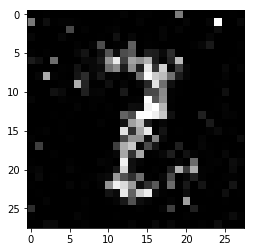

Number batches 78
20(0/78) D: 0.3818, G: 2.9936
20(1/78) D: 0.4057, G: 1.8058
20(2/78) D: 0.3873, G: 1.8136
20(3/78) D: 0.3872, G: 2.4562
20(4/78) D: 0.3590, G: 2.0436
20(5/78) D: 0.3419, G: 2.5662
20(6/78) D: 0.2906, G: 2.9045
20(7/78) D: 0.2680, G: 1.8577
20(8/78) D: 0.3921, G: 2.2235
20(9/78) D: 0.3356, G: 2.5322
20(10/78) D: 0.2702, G: 2.9788
20(11/78) D: 0.4252, G: 1.2503
20(12/78) D: 0.5291, G: 3.3465
20(13/78) D: 0.5031, G: 1.5584
20(14/78) D: 0.3951, G: 2.4947
20(15/78) D: 0.3709, G: 2.0646
20(16/78) D: 0.3431, G: 1.9430
20(17/78) D: 0.3446, G: 2.6751
20(18/78) D: 0.3516, G: 2.0876
20(19/78) D: 0.3179, G: 2.8108
20(20/78) D: 0.3459, G: 2.0698
20(21/78) D: 0.2887, G: 2.0973
20(22/78) D: 0.3254, G: 2.4625
20(23/78) D: 0.2683, G: 2.4125
20(24/78) D: 0.3508, G: 2.3712
20(25/78) D: 0.3092, G: 2.5270
20(26/78) D: 0.2691, G: 2.4233
20(27/78) D: 0.2921, G: 2.2583
20(28/78) D: 0.3418, G: 2.8408
20(29/78) D: 0.3557, G: 1.9973
20(30/78) D: 0.4500, G: 2.2928
20(31/78) D: 0.3292, G: 2.7356


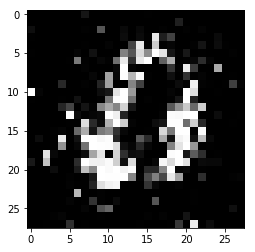

Number batches 78
21(0/78) D: 0.3166, G: 3.3389
21(1/78) D: 0.3246, G: 1.6311
21(2/78) D: 0.3884, G: 2.6231
21(3/78) D: 0.3336, G: 2.1407
21(4/78) D: 0.3798, G: 1.7846
21(5/78) D: 0.3207, G: 2.1363
21(6/78) D: 0.2689, G: 3.0561
21(7/78) D: 0.3620, G: 1.6174
21(8/78) D: 0.3722, G: 2.5958
21(9/78) D: 0.4362, G: 1.9106
21(10/78) D: 0.3046, G: 2.4718
21(11/78) D: 0.3114, G: 2.1288
21(12/78) D: 0.2944, G: 2.1112
21(13/78) D: 0.3769, G: 1.7653
21(14/78) D: 0.3236, G: 3.2230
21(15/78) D: 0.4036, G: 1.5090
21(16/78) D: 0.3973, G: 2.2500
21(17/78) D: 0.3474, G: 2.2183
21(18/78) D: 0.3377, G: 1.7082
21(19/78) D: 0.3459, G: 2.6282
21(20/78) D: 0.3332, G: 2.2485
21(21/78) D: 0.3417, G: 1.6023
21(22/78) D: 0.3565, G: 2.7606
21(23/78) D: 0.3814, G: 1.9159
21(24/78) D: 0.3520, G: 2.0301
21(25/78) D: 0.3465, G: 2.0209
21(26/78) D: 0.3041, G: 2.3946
21(27/78) D: 0.3206, G: 1.7254
21(28/78) D: 0.2989, G: 2.5599
21(29/78) D: 0.2992, G: 2.1349
21(30/78) D: 0.3811, G: 1.5647
21(31/78) D: 0.4049, G: 3.2991


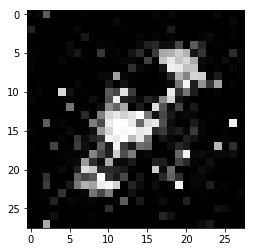

Number batches 78
22(0/78) D: 0.3375, G: 1.6460
22(1/78) D: 0.3270, G: 3.1999
22(2/78) D: 0.3874, G: 1.7435
22(3/78) D: 0.2878, G: 2.2540
22(4/78) D: 0.3793, G: 2.6009
22(5/78) D: 0.2798, G: 2.1262
22(6/78) D: 0.2791, G: 2.1747
22(7/78) D: 0.3352, G: 2.4163
22(8/78) D: 0.3704, G: 2.1558
22(9/78) D: 0.4164, G: 2.3517
22(10/78) D: 0.3200, G: 3.1584
22(11/78) D: 0.3730, G: 1.8817
22(12/78) D: 0.3393, G: 2.9095
22(13/78) D: 0.2964, G: 2.2938
22(14/78) D: 0.3023, G: 2.6288
22(15/78) D: 0.2389, G: 2.7684
22(16/78) D: 0.3002, G: 2.4617
22(17/78) D: 0.2887, G: 2.8459
22(18/78) D: 0.3633, G: 1.7007
22(19/78) D: 0.3442, G: 3.5265
22(20/78) D: 0.2656, G: 2.2852
22(21/78) D: 0.2761, G: 2.3918
22(22/78) D: 0.2615, G: 2.5350
22(23/78) D: 0.3473, G: 2.9800
22(24/78) D: 0.3221, G: 2.0664
22(25/78) D: 0.3086, G: 2.7850
22(26/78) D: 0.3750, G: 2.0624
22(27/78) D: 0.3559, G: 3.0331
22(28/78) D: 0.2973, G: 2.3972
22(29/78) D: 0.2932, G: 2.5649
22(30/78) D: 0.3495, G: 2.0860
22(31/78) D: 0.3051, G: 2.2711


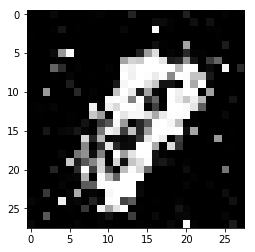

Number batches 78
23(0/78) D: 0.4199, G: 3.1551
23(1/78) D: 0.3966, G: 1.8451
23(2/78) D: 0.4204, G: 2.9295
23(3/78) D: 0.3077, G: 2.1204
23(4/78) D: 0.3471, G: 2.5017
23(5/78) D: 0.3380, G: 2.0976
23(6/78) D: 0.3557, G: 2.5512
23(7/78) D: 0.3423, G: 1.7387
23(8/78) D: 0.4039, G: 2.8966
23(9/78) D: 0.4168, G: 2.1992
23(10/78) D: 0.3169, G: 2.5653
23(11/78) D: 0.3465, G: 2.0777
23(12/78) D: 0.2988, G: 2.9394
23(13/78) D: 0.3088, G: 2.2197
23(14/78) D: 0.2726, G: 2.8941
23(15/78) D: 0.2227, G: 2.6906
23(16/78) D: 0.3296, G: 2.6531
23(17/78) D: 0.2128, G: 3.4012
23(18/78) D: 0.3760, G: 1.5300
23(19/78) D: 0.3343, G: 3.3513
23(20/78) D: 0.2885, G: 2.3356
23(21/78) D: 0.2687, G: 1.9546
23(22/78) D: 0.2797, G: 3.5299
23(23/78) D: 0.3374, G: 2.0344
23(24/78) D: 0.3161, G: 3.2496
23(25/78) D: 0.3053, G: 2.6457
23(26/78) D: 0.2397, G: 2.2142
23(27/78) D: 0.2827, G: 3.5267
23(28/78) D: 0.3332, G: 2.6807
23(29/78) D: 0.2986, G: 2.6181
23(30/78) D: 0.3077, G: 2.1332
23(31/78) D: 0.2735, G: 3.9151


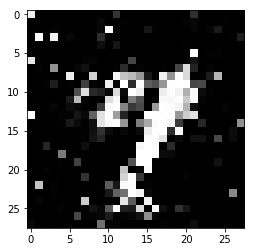

Number batches 78
24(0/78) D: 0.3701, G: 3.1390
24(1/78) D: 0.3339, G: 2.0902
24(2/78) D: 0.3782, G: 2.5255
24(3/78) D: 0.3188, G: 2.2627
24(4/78) D: 0.3369, G: 2.4849
24(5/78) D: 0.2828, G: 2.6487
24(6/78) D: 0.2108, G: 2.7537
24(7/78) D: 0.2936, G: 2.3625
24(8/78) D: 0.3279, G: 2.5099
24(9/78) D: 0.2689, G: 3.3173
24(10/78) D: 0.2291, G: 2.8155
24(11/78) D: 0.2361, G: 2.4005
24(12/78) D: 0.2451, G: 3.2737
24(13/78) D: 0.2752, G: 2.5079
24(14/78) D: 0.2465, G: 3.3652
24(15/78) D: 0.2874, G: 2.9568
24(16/78) D: 0.2329, G: 2.6472
24(17/78) D: 0.2279, G: 2.5402
24(18/78) D: 0.2999, G: 2.5830
24(19/78) D: 0.3652, G: 2.6142
24(20/78) D: 0.3618, G: 2.4576
24(21/78) D: 0.3002, G: 3.7806
24(22/78) D: 0.2979, G: 1.8239
24(23/78) D: 0.3767, G: 3.9375
24(24/78) D: 0.3879, G: 1.9928
24(25/78) D: 0.3236, G: 2.9688
24(26/78) D: 0.2489, G: 2.8206
24(27/78) D: 0.2833, G: 2.2330
24(28/78) D: 0.2710, G: 3.6903
24(29/78) D: 0.3063, G: 2.2708
24(30/78) D: 0.3053, G: 2.2933
24(31/78) D: 0.2671, G: 3.4744


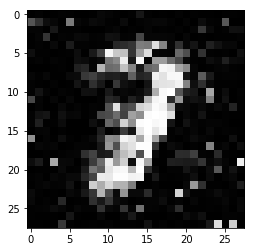

Number batches 78
25(0/78) D: 0.2911, G: 2.3448
25(1/78) D: 0.2770, G: 2.4790
25(2/78) D: 0.3680, G: 1.6704
25(3/78) D: 0.3748, G: 2.9979
25(4/78) D: 0.3708, G: 2.0328
25(5/78) D: 0.3529, G: 2.4586
25(6/78) D: 0.2794, G: 2.9118
25(7/78) D: 0.2555, G: 2.3154
25(8/78) D: 0.3895, G: 2.8189
25(9/78) D: 0.3034, G: 2.3135
25(10/78) D: 0.3793, G: 2.9940
25(11/78) D: 0.3116, G: 1.8934
25(12/78) D: 0.3082, G: 2.7842
25(13/78) D: 0.2750, G: 2.9820
25(14/78) D: 0.2606, G: 2.0762
25(15/78) D: 0.3213, G: 3.4451
25(16/78) D: 0.3752, G: 1.6624
25(17/78) D: 0.3293, G: 3.5616
25(18/78) D: 0.4075, G: 2.0086
25(19/78) D: 0.2963, G: 2.0312
25(20/78) D: 0.3377, G: 3.2755
25(21/78) D: 0.2971, G: 2.4763
25(22/78) D: 0.2746, G: 2.3352
25(23/78) D: 0.3354, G: 2.6614
25(24/78) D: 0.3331, G: 2.1166
25(25/78) D: 0.3304, G: 2.4962
25(26/78) D: 0.2660, G: 2.0665
25(27/78) D: 0.3276, G: 3.0910
25(28/78) D: 0.2962, G: 2.7680
25(29/78) D: 0.2540, G: 3.1079
25(30/78) D: 0.2533, G: 2.4408
25(31/78) D: 0.3360, G: 2.6996


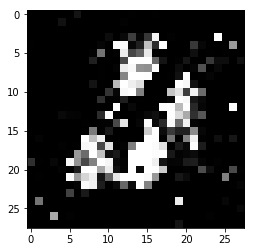

Number batches 78
26(0/78) D: 0.3904, G: 1.9143
26(1/78) D: 0.3281, G: 3.0900
26(2/78) D: 0.3065, G: 1.7851
26(3/78) D: 0.3525, G: 2.2183
26(4/78) D: 0.3545, G: 2.6360
26(5/78) D: 0.3582, G: 2.1460
26(6/78) D: 0.3102, G: 3.3314
26(7/78) D: 0.3805, G: 1.4382
26(8/78) D: 0.4360, G: 3.3084
26(9/78) D: 0.3496, G: 2.4017
26(10/78) D: 0.2927, G: 2.3619
26(11/78) D: 0.3774, G: 2.3130
26(12/78) D: 0.3399, G: 2.5540
26(13/78) D: 0.3348, G: 2.3575
26(14/78) D: 0.2878, G: 2.6582
26(15/78) D: 0.3017, G: 2.8025
26(16/78) D: 0.2659, G: 2.2313
26(17/78) D: 0.2680, G: 4.0505
26(18/78) D: 0.4267, G: 1.3065
26(19/78) D: 0.4016, G: 3.2356
26(20/78) D: 0.3904, G: 2.1757
26(21/78) D: 0.2847, G: 2.3079
26(22/78) D: 0.2538, G: 2.8686
26(23/78) D: 0.2767, G: 2.7460
26(24/78) D: 0.2826, G: 2.3625
26(25/78) D: 0.2693, G: 2.9417
26(26/78) D: 0.3084, G: 2.3458
26(27/78) D: 0.2922, G: 2.9272
26(28/78) D: 0.3328, G: 2.0680
26(29/78) D: 0.3457, G: 3.0338
26(30/78) D: 0.4818, G: 0.9527
26(31/78) D: 0.6176, G: 4.3362


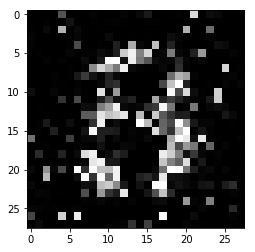

Number batches 78
27(0/78) D: 0.2442, G: 3.1769
27(1/78) D: 0.2715, G: 1.8895
27(2/78) D: 0.3574, G: 2.8818
27(3/78) D: 0.2772, G: 2.4856
27(4/78) D: 0.3056, G: 2.4828
27(5/78) D: 0.2886, G: 2.6864
27(6/78) D: 0.2437, G: 2.3158
27(7/78) D: 0.2549, G: 3.1465
27(8/78) D: 0.3938, G: 1.6259
27(9/78) D: 0.3853, G: 3.5651
27(10/78) D: 0.2460, G: 3.4356
27(11/78) D: 0.2473, G: 1.9270
27(12/78) D: 0.3349, G: 3.4185
27(13/78) D: 0.3126, G: 2.4563
27(14/78) D: 0.2625, G: 2.0094
27(15/78) D: 0.3122, G: 3.5257
27(16/78) D: 0.2771, G: 2.6015
27(17/78) D: 0.2546, G: 2.0391
27(18/78) D: 0.2598, G: 3.1409
27(19/78) D: 0.2923, G: 2.4828
27(20/78) D: 0.2736, G: 2.6226
27(21/78) D: 0.2599, G: 3.0320
27(22/78) D: 0.2923, G: 2.2697
27(23/78) D: 0.2914, G: 2.3395
27(24/78) D: 0.3194, G: 2.6001
27(25/78) D: 0.2358, G: 2.4964
27(26/78) D: 0.2797, G: 2.7745
27(27/78) D: 0.2413, G: 2.8654
27(28/78) D: 0.2437, G: 3.0207
27(29/78) D: 0.2581, G: 1.6675
27(30/78) D: 0.3500, G: 4.0547
27(31/78) D: 0.2869, G: 2.8973


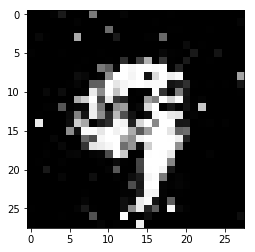

Number batches 78
28(0/78) D: 0.3245, G: 2.1077
28(1/78) D: 0.3466, G: 2.8723
28(2/78) D: 0.3167, G: 1.9888
28(3/78) D: 0.3391, G: 2.7925
28(4/78) D: 0.2959, G: 2.1851
28(5/78) D: 0.3032, G: 2.3269
28(6/78) D: 0.2640, G: 3.3479
28(7/78) D: 0.3113, G: 1.9567
28(8/78) D: 0.3443, G: 2.7720
28(9/78) D: 0.2578, G: 2.7636
28(10/78) D: 0.1568, G: 3.1806
28(11/78) D: 0.2589, G: 1.8215
28(12/78) D: 0.2818, G: 3.3012
28(13/78) D: 0.2861, G: 2.3920
28(14/78) D: 0.2783, G: 2.4119
28(15/78) D: 0.2162, G: 2.8894
28(16/78) D: 0.2041, G: 2.6534
28(17/78) D: 0.2135, G: 2.7652
28(18/78) D: 0.2290, G: 2.6492
28(19/78) D: 0.2118, G: 2.7965
28(20/78) D: 0.2431, G: 2.6665
28(21/78) D: 0.2256, G: 2.6948
28(22/78) D: 0.2483, G: 2.1404
28(23/78) D: 0.2582, G: 3.1315
28(24/78) D: 0.3251, G: 2.0691
28(25/78) D: 0.2652, G: 2.9770
28(26/78) D: 0.2903, G: 2.4446
28(27/78) D: 0.2618, G: 2.5360
28(28/78) D: 0.2278, G: 4.1555
28(29/78) D: 0.3450, G: 2.0637
28(30/78) D: 0.2886, G: 2.6857
28(31/78) D: 0.2236, G: 2.7725


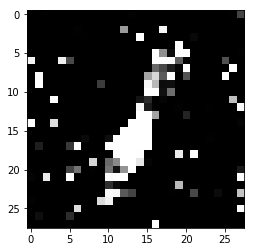

Number batches 78
29(0/78) D: 0.2559, G: 2.5110
29(1/78) D: 0.2220, G: 3.1105
29(2/78) D: 0.2706, G: 2.0213
29(3/78) D: 0.2979, G: 3.1896
29(4/78) D: 0.2830, G: 2.2848
29(5/78) D: 0.2713, G: 2.9106
29(6/78) D: 0.2196, G: 3.0298
29(7/78) D: 0.1911, G: 2.9977
29(8/78) D: 0.2059, G: 2.5480
29(9/78) D: 0.2558, G: 2.8897
29(10/78) D: 0.2249, G: 2.7470
29(11/78) D: 0.2282, G: 2.5532
29(12/78) D: 0.2206, G: 2.6143
29(13/78) D: 0.2453, G: 2.7604
29(14/78) D: 0.2586, G: 2.4228
29(15/78) D: 0.2657, G: 2.8218
29(16/78) D: 0.1582, G: 3.3107
29(17/78) D: 0.2042, G: 2.9140
29(18/78) D: 0.2098, G: 2.3454
29(19/78) D: 0.2614, G: 4.8750
29(20/78) D: 0.4137, G: 1.9415
29(21/78) D: 0.2848, G: 3.1935
29(22/78) D: 0.2109, G: 2.8732
29(23/78) D: 0.1712, G: 2.5379
29(24/78) D: 0.2913, G: 3.2687
29(25/78) D: 0.2364, G: 2.3645
29(26/78) D: 0.2367, G: 2.5971
29(27/78) D: 0.2982, G: 3.9242
29(28/78) D: 0.1996, G: 3.0470
29(29/78) D: 0.2295, G: 2.6091
29(30/78) D: 0.2363, G: 3.1863
29(31/78) D: 0.2467, G: 2.9364


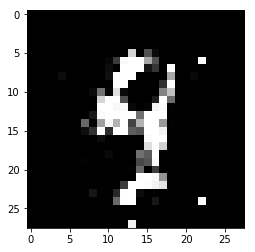

Number batches 78
30(0/78) D: 0.1936, G: 3.0110
30(1/78) D: 0.1671, G: 2.8377
30(2/78) D: 0.2760, G: 2.6661
30(3/78) D: 0.3330, G: 2.3707
30(4/78) D: 0.3092, G: 2.7319
30(5/78) D: 0.2924, G: 2.7980
30(6/78) D: 0.2532, G: 2.9411
30(7/78) D: 0.2510, G: 2.3882
30(8/78) D: 0.2867, G: 3.4483
30(9/78) D: 0.2267, G: 3.2151
30(10/78) D: 0.2000, G: 2.6085
30(11/78) D: 0.2529, G: 2.7116
30(12/78) D: 0.2271, G: 3.2747
30(13/78) D: 0.2594, G: 2.5555
30(14/78) D: 0.2341, G: 3.4236
30(15/78) D: 0.2302, G: 2.9289
30(16/78) D: 0.2141, G: 2.9690
30(17/78) D: 0.1853, G: 3.0816
30(18/78) D: 0.3609, G: 1.8839
30(19/78) D: 0.4037, G: 4.4137
30(20/78) D: 0.4386, G: 2.4047
30(21/78) D: 0.2186, G: 2.2635
30(22/78) D: 0.2759, G: 3.6048
30(23/78) D: 0.3900, G: 1.8569
30(24/78) D: 0.3515, G: 2.4137
30(25/78) D: 0.2905, G: 3.5859
30(26/78) D: 0.2763, G: 2.4839
30(27/78) D: 0.2688, G: 2.7938
30(28/78) D: 0.2912, G: 3.6929
30(29/78) D: 0.2546, G: 2.4874
30(30/78) D: 0.2249, G: 2.9786
30(31/78) D: 0.2563, G: 3.0681


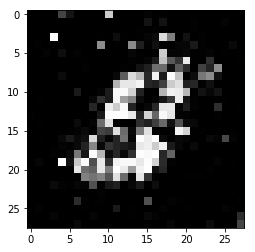

Number batches 78
31(0/78) D: 0.4099, G: 1.7592
31(1/78) D: 0.3814, G: 3.1401
31(2/78) D: 0.4029, G: 2.2194
31(3/78) D: 0.3228, G: 2.4940
31(4/78) D: 0.2975, G: 2.8794
31(5/78) D: 0.3269, G: 2.1868
31(6/78) D: 0.2918, G: 2.8805
31(7/78) D: 0.3058, G: 2.9805
31(8/78) D: 0.3560, G: 1.3842
31(9/78) D: 0.4718, G: 3.9760
31(10/78) D: 0.3620, G: 2.7150
31(11/78) D: 0.3069, G: 1.5363
31(12/78) D: 0.3913, G: 3.2060
31(13/78) D: 0.2849, G: 3.1866
31(14/78) D: 0.2666, G: 1.9953
31(15/78) D: 0.2537, G: 2.7343
31(16/78) D: 0.2925, G: 3.0008
31(17/78) D: 0.2466, G: 2.5942
31(18/78) D: 0.2746, G: 2.6929
31(19/78) D: 0.2381, G: 2.4346
31(20/78) D: 0.2808, G: 2.4917
31(21/78) D: 0.2899, G: 2.6408
31(22/78) D: 0.2850, G: 2.4714
31(23/78) D: 0.2965, G: 2.2922
31(24/78) D: 0.2975, G: 2.7891
31(25/78) D: 0.2105, G: 2.6297
31(26/78) D: 0.2647, G: 2.4968
31(27/78) D: 0.2946, G: 2.9323
31(28/78) D: 0.1849, G: 3.1059
31(29/78) D: 0.2679, G: 2.2399
31(30/78) D: 0.3405, G: 2.3030
31(31/78) D: 0.3600, G: 2.7269


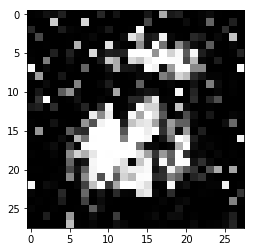

Number batches 78
32(0/78) D: 0.2249, G: 2.2520
32(1/78) D: 0.3014, G: 2.6513
32(2/78) D: 0.3243, G: 2.3063
32(3/78) D: 0.3792, G: 3.0290
32(4/78) D: 0.3319, G: 2.9023
32(5/78) D: 0.2946, G: 2.5133
32(6/78) D: 0.2548, G: 2.9876
32(7/78) D: 0.3254, G: 2.3490
32(8/78) D: 0.2726, G: 2.7127
32(9/78) D: 0.2416, G: 3.5913
32(10/78) D: 0.2682, G: 2.5539
32(11/78) D: 0.2383, G: 3.3994
32(12/78) D: 0.2696, G: 2.8783
32(13/78) D: 0.2127, G: 2.9440
32(14/78) D: 0.1794, G: 3.3943
32(15/78) D: 0.1797, G: 3.0293
32(16/78) D: 0.2218, G: 2.7446
32(17/78) D: 0.1944, G: 3.3945
32(18/78) D: 0.2539, G: 3.0138
32(19/78) D: 0.2175, G: 2.6003
32(20/78) D: 0.2632, G: 3.4221
32(21/78) D: 0.2451, G: 1.9586
32(22/78) D: 0.3208, G: 4.0787
32(23/78) D: 0.4112, G: 1.2692
32(24/78) D: 0.3691, G: 3.6852
32(25/78) D: 0.3081, G: 2.4749
32(26/78) D: 0.2394, G: 2.6254
32(27/78) D: 0.2056, G: 2.2872
32(28/78) D: 0.2119, G: 3.2941
32(29/78) D: 0.1779, G: 2.5356
32(30/78) D: 0.1624, G: 2.4212
32(31/78) D: 0.1833, G: 3.2526


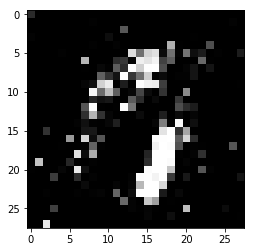

Number batches 78
33(0/78) D: 0.3151, G: 3.4427
33(1/78) D: 0.4185, G: 2.0762
33(2/78) D: 0.3086, G: 3.1862
33(3/78) D: 0.2680, G: 2.6799
33(4/78) D: 0.2196, G: 3.2417
33(5/78) D: 0.3394, G: 2.5620
33(6/78) D: 0.3107, G: 3.3818
33(7/78) D: 0.3088, G: 2.4404
33(8/78) D: 0.2499, G: 2.9150
33(9/78) D: 0.3271, G: 3.3021
33(10/78) D: 0.2708, G: 2.8567
33(11/78) D: 0.2900, G: 3.2697
33(12/78) D: 0.2181, G: 3.0713
33(13/78) D: 0.2671, G: 1.8486
33(14/78) D: 0.3175, G: 4.1955
33(15/78) D: 0.2429, G: 3.5914
33(16/78) D: 0.2278, G: 2.0389
33(17/78) D: 0.3402, G: 3.7195
33(18/78) D: 0.2331, G: 3.2166
33(19/78) D: 0.2605, G: 1.5024
33(20/78) D: 0.3837, G: 4.8161
33(21/78) D: 0.4525, G: 2.5921
33(22/78) D: 0.1825, G: 2.1399
33(23/78) D: 0.2710, G: 3.5434
33(24/78) D: 0.2347, G: 2.9918
33(25/78) D: 0.2093, G: 2.4874
33(26/78) D: 0.2305, G: 2.7883
33(27/78) D: 0.2281, G: 2.7153
33(28/78) D: 0.1922, G: 2.6744
33(29/78) D: 0.1736, G: 3.2334
33(30/78) D: 0.1910, G: 2.9428
33(31/78) D: 0.1908, G: 3.4197


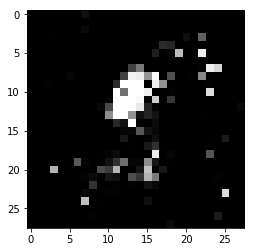

Number batches 78
34(0/78) D: 0.3217, G: 2.9913
34(1/78) D: 0.2793, G: 2.6169
34(2/78) D: 0.3228, G: 2.3005
34(3/78) D: 0.3460, G: 2.2196
34(4/78) D: 0.3130, G: 2.7297
34(5/78) D: 0.2922, G: 2.4313
34(6/78) D: 0.3175, G: 2.5467
34(7/78) D: 0.2693, G: 2.6420
34(8/78) D: 0.3339, G: 1.6100
34(9/78) D: 0.3447, G: 2.8418
34(10/78) D: 0.3275, G: 2.7445
34(11/78) D: 0.3318, G: 2.2766
34(12/78) D: 0.3286, G: 3.4130
34(13/78) D: 0.3234, G: 2.3108
34(14/78) D: 0.3346, G: 2.7710
34(15/78) D: 0.3356, G: 2.2919
34(16/78) D: 0.3145, G: 3.5284
34(17/78) D: 0.3207, G: 2.4055
34(18/78) D: 0.3846, G: 2.8442
34(19/78) D: 0.3376, G: 2.5466
34(20/78) D: 0.3004, G: 2.8619
34(21/78) D: 0.2477, G: 2.8247
34(22/78) D: 0.2353, G: 2.2535
34(23/78) D: 0.3199, G: 3.0346
34(24/78) D: 0.2417, G: 2.1692
34(25/78) D: 0.2750, G: 2.5574
34(26/78) D: 0.2209, G: 3.3010
34(27/78) D: 0.3479, G: 2.1916
34(28/78) D: 0.3391, G: 3.1693
34(29/78) D: 0.2990, G: 2.9796
34(30/78) D: 0.2805, G: 2.3088
34(31/78) D: 0.2872, G: 3.5343


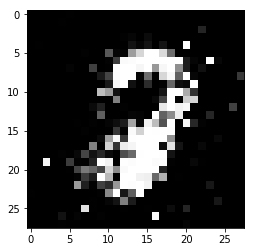

Number batches 78
35(0/78) D: 0.2785, G: 2.8878
35(1/78) D: 0.2554, G: 2.9622
35(2/78) D: 0.2396, G: 2.1487
35(3/78) D: 0.2794, G: 3.6829
35(4/78) D: 0.3009, G: 2.7660
35(5/78) D: 0.3275, G: 2.6224
35(6/78) D: 0.2773, G: 3.6368
35(7/78) D: 0.3081, G: 2.2629
35(8/78) D: 0.3979, G: 2.9474
35(9/78) D: 0.2999, G: 2.4856
35(10/78) D: 0.2866, G: 2.7837
35(11/78) D: 0.2333, G: 2.9415
35(12/78) D: 0.2864, G: 2.2602
35(13/78) D: 0.2933, G: 3.6298
35(14/78) D: 0.3377, G: 1.9012
35(15/78) D: 0.3039, G: 3.0275
35(16/78) D: 0.2763, G: 2.4636
35(17/78) D: 0.2629, G: 2.1146
35(18/78) D: 0.2793, G: 3.6949
35(19/78) D: 0.3088, G: 2.4849
35(20/78) D: 0.2728, G: 3.2301
35(21/78) D: 0.2690, G: 2.6188
35(22/78) D: 0.2921, G: 2.2942
35(23/78) D: 0.2997, G: 2.9286
35(24/78) D: 0.4324, G: 2.1951
35(25/78) D: 0.4199, G: 4.1050
35(26/78) D: 0.2980, G: 2.2274
35(27/78) D: 0.3545, G: 3.0486
35(28/78) D: 0.3964, G: 2.6335
35(29/78) D: 0.3529, G: 2.6804
35(30/78) D: 0.2594, G: 3.4961
35(31/78) D: 0.3275, G: 2.9612


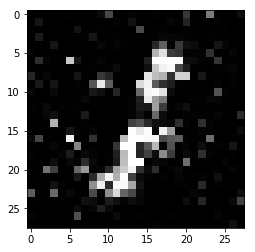

Number batches 78
36(0/78) D: 0.2827, G: 2.5414
36(1/78) D: 0.2749, G: 2.0390
36(2/78) D: 0.3165, G: 2.8116
36(3/78) D: 0.3169, G: 2.3216
36(4/78) D: 0.2800, G: 2.9479
36(5/78) D: 0.3245, G: 2.4286
36(6/78) D: 0.3300, G: 2.6242
36(7/78) D: 0.2885, G: 2.7026
36(8/78) D: 0.3318, G: 1.9089
36(9/78) D: 0.3946, G: 3.9319
36(10/78) D: 0.4422, G: 1.6936
36(11/78) D: 0.3426, G: 2.5451
36(12/78) D: 0.3483, G: 2.7496
36(13/78) D: 0.2905, G: 2.1118
36(14/78) D: 0.3111, G: 2.9533
36(15/78) D: 0.3096, G: 2.6582
36(16/78) D: 0.3320, G: 2.4158
36(17/78) D: 0.3194, G: 2.7063
36(18/78) D: 0.3228, G: 3.0098
36(19/78) D: 0.2425, G: 2.2944
36(20/78) D: 0.3408, G: 2.0689
36(21/78) D: 0.3419, G: 3.6382
36(22/78) D: 0.4022, G: 1.7524
36(23/78) D: 0.4923, G: 3.7454
36(24/78) D: 0.4712, G: 1.5522
36(25/78) D: 0.3269, G: 2.5074
36(26/78) D: 0.3141, G: 3.1368
36(27/78) D: 0.2389, G: 2.5770
36(28/78) D: 0.2089, G: 2.2170
36(29/78) D: 0.2620, G: 2.7800
36(30/78) D: 0.2804, G: 2.6449
36(31/78) D: 0.2542, G: 2.6964


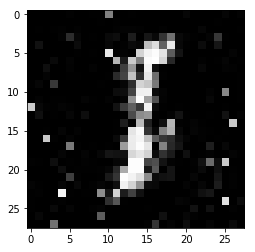

Number batches 78
37(0/78) D: 0.3090, G: 2.5211
37(1/78) D: 0.3509, G: 1.8926
37(2/78) D: 0.3747, G: 2.6979
37(3/78) D: 0.3968, G: 1.6389
37(4/78) D: 0.4038, G: 3.0012
37(5/78) D: 0.3769, G: 1.8937
37(6/78) D: 0.3666, G: 2.3603
37(7/78) D: 0.3903, G: 2.9255
37(8/78) D: 0.4065, G: 1.4113
37(9/78) D: 0.4957, G: 4.1767
37(10/78) D: 0.4878, G: 2.0375
37(11/78) D: 0.3548, G: 1.4024
37(12/78) D: 0.4055, G: 3.0045
37(13/78) D: 0.3700, G: 2.1596
37(14/78) D: 0.2897, G: 2.5263
37(15/78) D: 0.3006, G: 2.8932
37(16/78) D: 0.3235, G: 2.2454
37(17/78) D: 0.3153, G: 3.0180
37(18/78) D: 0.2875, G: 2.4072
37(19/78) D: 0.2793, G: 2.3061
37(20/78) D: 0.3338, G: 2.4748
37(21/78) D: 0.2626, G: 2.4580
37(22/78) D: 0.3082, G: 2.0924
37(23/78) D: 0.2875, G: 2.3223
37(24/78) D: 0.2989, G: 2.5826
37(25/78) D: 0.3377, G: 2.3916
37(26/78) D: 0.3748, G: 2.1209
37(27/78) D: 0.3212, G: 2.0915
37(28/78) D: 0.3218, G: 2.7380
37(29/78) D: 0.2192, G: 2.1353
37(30/78) D: 0.3333, G: 2.0882
37(31/78) D: 0.3149, G: 2.9665


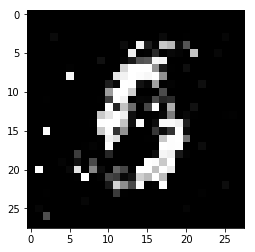

Number batches 78
38(0/78) D: 0.3038, G: 2.3952
38(1/78) D: 0.2627, G: 2.6180
38(2/78) D: 0.3557, G: 2.1294
38(3/78) D: 0.2594, G: 2.6918
38(4/78) D: 0.2868, G: 2.2473
38(5/78) D: 0.2578, G: 2.5995
38(6/78) D: 0.2791, G: 2.6241
38(7/78) D: 0.2677, G: 2.5162
38(8/78) D: 0.2565, G: 2.9177
38(9/78) D: 0.2704, G: 2.2153
38(10/78) D: 0.2708, G: 3.1899
38(11/78) D: 0.2878, G: 2.0294
38(12/78) D: 0.3111, G: 3.6051
38(13/78) D: 0.4947, G: 1.1042
38(14/78) D: 0.5521, G: 3.9405
38(15/78) D: 0.3217, G: 2.9036
38(16/78) D: 0.2178, G: 1.7624
38(17/78) D: 0.2913, G: 2.6541
38(18/78) D: 0.2736, G: 2.9423
38(19/78) D: 0.2700, G: 2.3543
38(20/78) D: 0.2587, G: 2.4323
38(21/78) D: 0.2309, G: 2.7387
38(22/78) D: 0.2854, G: 2.4318
38(23/78) D: 0.2936, G: 2.3518
38(24/78) D: 0.3354, G: 2.3042
38(25/78) D: 0.3152, G: 2.8358
38(26/78) D: 0.2593, G: 2.3929
38(27/78) D: 0.3485, G: 2.6628
38(28/78) D: 0.2696, G: 1.9759
38(29/78) D: 0.3086, G: 2.6957
38(30/78) D: 0.3378, G: 2.1206
38(31/78) D: 0.2979, G: 2.9632


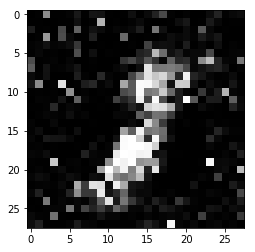

Number batches 78
39(0/78) D: 0.3251, G: 2.2765
39(1/78) D: 0.2355, G: 2.6514
39(2/78) D: 0.2613, G: 2.2295
39(3/78) D: 0.2893, G: 2.8663
39(4/78) D: 0.2852, G: 2.7014
39(5/78) D: 0.2582, G: 2.6998
39(6/78) D: 0.3311, G: 2.2554
39(7/78) D: 0.2893, G: 3.2182
39(8/78) D: 0.3643, G: 1.2037
39(9/78) D: 0.5707, G: 4.1419
39(10/78) D: 0.4784, G: 1.8014
39(11/78) D: 0.2701, G: 2.0863
39(12/78) D: 0.2179, G: 3.0092
39(13/78) D: 0.3200, G: 1.9289
39(14/78) D: 0.2808, G: 2.6082
39(15/78) D: 0.2567, G: 2.4802
39(16/78) D: 0.2633, G: 2.2871
39(17/78) D: 0.2573, G: 2.5290
39(18/78) D: 0.2820, G: 2.3147
39(19/78) D: 0.2997, G: 2.1166
39(20/78) D: 0.2789, G: 3.0207
39(21/78) D: 0.3475, G: 1.8493
39(22/78) D: 0.3015, G: 2.8562
39(23/78) D: 0.3647, G: 1.9595
39(24/78) D: 0.3510, G: 2.3641
39(25/78) D: 0.2863, G: 2.7216
39(26/78) D: 0.2721, G: 2.4733
39(27/78) D: 0.2913, G: 2.5776
39(28/78) D: 0.2634, G: 2.7492
39(29/78) D: 0.3097, G: 2.4266
39(30/78) D: 0.2917, G: 2.3288
39(31/78) D: 0.3638, G: 2.8411


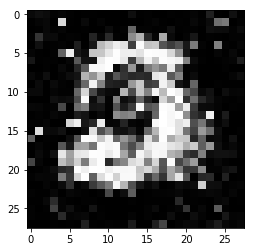

Number batches 78
40(0/78) D: 0.3851, G: 2.5893
40(1/78) D: 0.2890, G: 1.7730
40(2/78) D: 0.3349, G: 2.4218
40(3/78) D: 0.2981, G: 2.6585
40(4/78) D: 0.3155, G: 1.9989
40(5/78) D: 0.2582, G: 2.2386
40(6/78) D: 0.2536, G: 2.8538
40(7/78) D: 0.3025, G: 1.9928
40(8/78) D: 0.3342, G: 2.4792
40(9/78) D: 0.3232, G: 2.1373
40(10/78) D: 0.2612, G: 2.6831
40(11/78) D: 0.2897, G: 2.3397
40(12/78) D: 0.2882, G: 2.0866
40(13/78) D: 0.2897, G: 2.8637
40(14/78) D: 0.3203, G: 2.0844
40(15/78) D: 0.2952, G: 2.0174
40(16/78) D: 0.2917, G: 2.4828
40(17/78) D: 0.2683, G: 2.5346
40(18/78) D: 0.2280, G: 2.5891
40(19/78) D: 0.3037, G: 2.5620
40(20/78) D: 0.2393, G: 2.3797
40(21/78) D: 0.2714, G: 2.4011
40(22/78) D: 0.2884, G: 2.0264
40(23/78) D: 0.3207, G: 2.7805
40(24/78) D: 0.3261, G: 2.2043
40(25/78) D: 0.3085, G: 2.6988
40(26/78) D: 0.3284, G: 2.3823
40(27/78) D: 0.3037, G: 2.9460
40(28/78) D: 0.2929, G: 2.2002
40(29/78) D: 0.2752, G: 2.8461
40(30/78) D: 0.3167, G: 2.6913
40(31/78) D: 0.2568, G: 1.9516


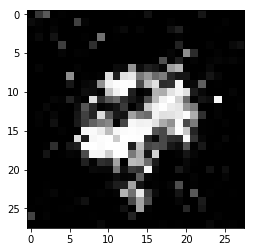

Number batches 78
41(0/78) D: 0.4122, G: 1.8737
41(1/78) D: 0.3420, G: 2.1941
41(2/78) D: 0.3773, G: 1.5920
41(3/78) D: 0.3927, G: 3.1592
41(4/78) D: 0.4038, G: 1.4774
41(5/78) D: 0.3362, G: 2.5734
41(6/78) D: 0.3044, G: 2.4921
41(7/78) D: 0.2808, G: 1.8192
41(8/78) D: 0.3342, G: 2.5464
41(9/78) D: 0.2362, G: 3.0783
41(10/78) D: 0.2793, G: 2.5330
41(11/78) D: 0.2937, G: 2.5253
41(12/78) D: 0.3109, G: 2.2463
41(13/78) D: 0.2583, G: 2.5805
41(14/78) D: 0.2661, G: 2.0113
41(15/78) D: 0.2681, G: 2.8343
41(16/78) D: 0.3372, G: 2.1013
41(17/78) D: 0.2852, G: 2.4826
41(18/78) D: 0.2469, G: 2.6083
41(19/78) D: 0.3162, G: 2.3871
41(20/78) D: 0.2795, G: 2.3741
41(21/78) D: 0.2969, G: 2.5776
41(22/78) D: 0.3207, G: 2.2696
41(23/78) D: 0.3273, G: 2.4972
41(24/78) D: 0.3007, G: 2.3987
41(25/78) D: 0.3520, G: 2.3609
41(26/78) D: 0.3375, G: 2.4732
41(27/78) D: 0.3526, G: 2.1479
41(28/78) D: 0.3091, G: 2.8804
41(29/78) D: 0.2765, G: 1.8509
41(30/78) D: 0.3086, G: 2.3521
41(31/78) D: 0.3274, G: 2.9722


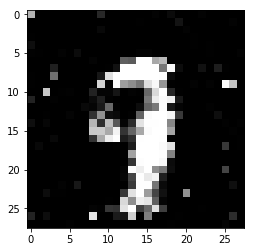

Number batches 78
42(0/78) D: 0.4108, G: 1.8214
42(1/78) D: 0.3159, G: 2.6290
42(2/78) D: 0.2941, G: 2.1886
42(3/78) D: 0.2734, G: 2.4744
42(4/78) D: 0.2751, G: 2.1241
42(5/78) D: 0.2739, G: 2.5475
42(6/78) D: 0.2737, G: 2.4561
42(7/78) D: 0.2494, G: 2.3148
42(8/78) D: 0.3354, G: 1.7989
42(9/78) D: 0.3560, G: 3.9018
42(10/78) D: 0.4228, G: 1.9862
42(11/78) D: 0.3332, G: 2.2709
42(12/78) D: 0.3169, G: 2.9675
42(13/78) D: 0.3006, G: 1.8522
42(14/78) D: 0.2556, G: 2.0086
42(15/78) D: 0.3139, G: 3.0361
42(16/78) D: 0.3302, G: 2.0133
42(17/78) D: 0.3076, G: 2.8797
42(18/78) D: 0.3562, G: 1.5656
42(19/78) D: 0.4329, G: 2.8002
42(20/78) D: 0.3002, G: 2.7260
42(21/78) D: 0.2889, G: 2.1145
42(22/78) D: 0.3131, G: 2.3387
42(23/78) D: 0.3553, G: 2.0018
42(24/78) D: 0.3764, G: 2.1222
42(25/78) D: 0.3290, G: 2.1470
42(26/78) D: 0.3499, G: 1.7015
42(27/78) D: 0.3627, G: 2.7161
42(28/78) D: 0.3429, G: 2.1992
42(29/78) D: 0.2832, G: 2.5717
42(30/78) D: 0.3404, G: 2.0096
42(31/78) D: 0.3618, G: 2.6812


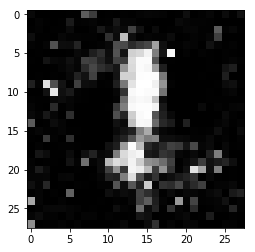

Number batches 78
43(0/78) D: 0.3959, G: 2.0529
43(1/78) D: 0.3586, G: 1.7623
43(2/78) D: 0.3641, G: 2.0553
43(3/78) D: 0.3553, G: 2.0662
43(4/78) D: 0.3580, G: 2.1003
43(5/78) D: 0.3322, G: 2.0573
43(6/78) D: 0.3117, G: 2.6131
43(7/78) D: 0.3023, G: 2.0141
43(8/78) D: 0.3609, G: 1.4117
43(9/78) D: 0.4166, G: 2.3081
43(10/78) D: 0.3483, G: 2.6946
43(11/78) D: 0.3166, G: 1.5261
43(12/78) D: 0.3692, G: 2.8456
43(13/78) D: 0.3382, G: 2.3072
43(14/78) D: 0.3807, G: 2.2037
43(15/78) D: 0.3075, G: 2.2944
43(16/78) D: 0.3397, G: 2.2626
43(17/78) D: 0.2723, G: 2.6246
43(18/78) D: 0.2907, G: 1.6706
43(19/78) D: 0.3835, G: 2.0949
43(20/78) D: 0.3443, G: 2.8341
43(21/78) D: 0.3020, G: 2.0637
43(22/78) D: 0.2787, G: 2.1173
43(23/78) D: 0.3268, G: 2.3317
43(24/78) D: 0.3651, G: 2.1401
43(25/78) D: 0.3795, G: 1.9777
43(26/78) D: 0.3284, G: 2.4071
43(27/78) D: 0.3325, G: 2.0088
43(28/78) D: 0.3167, G: 2.0496
43(29/78) D: 0.2824, G: 1.8362
43(30/78) D: 0.3623, G: 2.2289
43(31/78) D: 0.2963, G: 1.8673


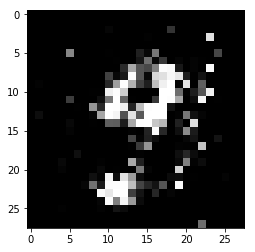

Number batches 78
44(0/78) D: 0.2844, G: 2.2334
44(1/78) D: 0.3925, G: 1.9568
44(2/78) D: 0.4295, G: 2.0807
44(3/78) D: 0.2949, G: 2.3255
44(4/78) D: 0.3242, G: 2.2490
44(5/78) D: 0.3379, G: 2.3030
44(6/78) D: 0.3531, G: 2.6750
44(7/78) D: 0.3193, G: 2.6709
44(8/78) D: 0.3734, G: 1.6312
44(9/78) D: 0.4386, G: 2.6689
44(10/78) D: 0.4489, G: 2.2995
44(11/78) D: 0.2861, G: 2.4280
44(12/78) D: 0.2628, G: 2.2046
44(13/78) D: 0.3516, G: 2.4047
44(14/78) D: 0.2912, G: 1.6556
44(15/78) D: 0.4145, G: 3.8032
44(16/78) D: 0.5216, G: 1.4517
44(17/78) D: 0.4183, G: 2.6644
44(18/78) D: 0.3499, G: 2.3205
44(19/78) D: 0.4156, G: 1.4765
44(20/78) D: 0.4031, G: 2.5860
44(21/78) D: 0.4458, G: 2.1580
44(22/78) D: 0.3456, G: 2.1821
44(23/78) D: 0.3512, G: 1.9869
44(24/78) D: 0.3530, G: 1.8393
44(25/78) D: 0.3789, G: 2.0630
44(26/78) D: 0.3398, G: 2.5613
44(27/78) D: 0.3594, G: 1.6700
44(28/78) D: 0.3969, G: 2.8298
44(29/78) D: 0.3461, G: 1.8941
44(30/78) D: 0.3352, G: 1.7696
44(31/78) D: 0.3133, G: 2.2524


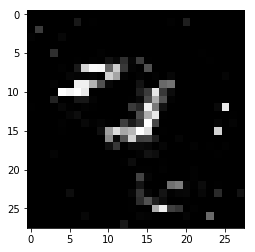

Number batches 78
45(0/78) D: 0.3375, G: 2.3013
45(1/78) D: 0.4362, G: 1.7618
45(2/78) D: 0.4111, G: 1.9613
45(3/78) D: 0.3470, G: 2.0775
45(4/78) D: 0.4051, G: 1.7758
45(5/78) D: 0.3957, G: 1.8561
45(6/78) D: 0.3213, G: 2.4756
45(7/78) D: 0.3036, G: 1.9771
45(8/78) D: 0.3524, G: 1.5375
45(9/78) D: 0.4366, G: 2.0589
45(10/78) D: 0.3583, G: 2.4408
45(11/78) D: 0.3044, G: 2.1562
45(12/78) D: 0.3999, G: 1.5592
45(13/78) D: 0.3893, G: 2.5194
45(14/78) D: 0.3451, G: 2.0692
45(15/78) D: 0.3384, G: 2.1860
45(16/78) D: 0.3238, G: 2.5002
45(17/78) D: 0.3525, G: 1.6330
45(18/78) D: 0.3988, G: 2.6852
45(19/78) D: 0.3615, G: 1.8363
45(20/78) D: 0.3872, G: 1.9574
45(21/78) D: 0.4217, G: 1.7212
45(22/78) D: 0.3633, G: 2.5125
45(23/78) D: 0.3496, G: 1.4386
45(24/78) D: 0.3991, G: 1.7919
45(25/78) D: 0.3513, G: 2.1047
45(26/78) D: 0.3869, G: 1.6384
45(27/78) D: 0.3685, G: 2.0600
45(28/78) D: 0.3407, G: 2.5218
45(29/78) D: 0.3834, G: 1.5387
45(30/78) D: 0.4159, G: 1.6702
45(31/78) D: 0.3554, G: 1.9802


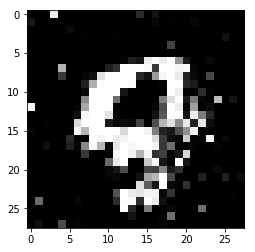

Number batches 78
46(0/78) D: 0.3431, G: 2.2707
46(1/78) D: 0.3542, G: 1.7206
46(2/78) D: 0.3676, G: 1.6513
46(3/78) D: 0.3739, G: 2.0743
46(4/78) D: 0.4129, G: 1.5348
46(5/78) D: 0.3618, G: 2.0487
46(6/78) D: 0.3825, G: 2.1661
46(7/78) D: 0.3269, G: 2.0102
46(8/78) D: 0.3288, G: 1.8175
46(9/78) D: 0.3951, G: 2.1706
46(10/78) D: 0.3804, G: 1.5250
46(11/78) D: 0.4343, G: 2.6099
46(12/78) D: 0.4569, G: 1.7529
46(13/78) D: 0.3804, G: 1.4310
46(14/78) D: 0.3327, G: 1.8684
46(15/78) D: 0.3696, G: 1.9725
46(16/78) D: 0.3631, G: 2.4417
46(17/78) D: 0.3586, G: 1.5748
46(18/78) D: 0.3259, G: 1.8418
46(19/78) D: 0.3561, G: 2.2112
46(20/78) D: 0.3397, G: 2.1757
46(21/78) D: 0.4217, G: 1.5406
46(22/78) D: 0.3775, G: 2.1958
46(23/78) D: 0.4087, G: 2.5543
46(24/78) D: 0.3728, G: 1.6132
46(25/78) D: 0.4197, G: 2.0798
46(26/78) D: 0.4043, G: 1.6553
46(27/78) D: 0.4302, G: 2.2492
46(28/78) D: 0.3610, G: 2.2765
46(29/78) D: 0.2723, G: 1.7926
46(30/78) D: 0.2970, G: 2.1141
46(31/78) D: 0.3475, G: 1.9373


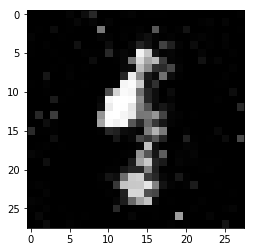

Number batches 78
47(0/78) D: 0.3137, G: 1.9617
47(1/78) D: 0.3235, G: 2.0494
47(2/78) D: 0.3385, G: 2.0998
47(3/78) D: 0.3311, G: 1.7783
47(4/78) D: 0.4106, G: 1.6974
47(5/78) D: 0.4155, G: 2.7001
47(6/78) D: 0.4954, G: 1.3532
47(7/78) D: 0.4209, G: 1.9694
47(8/78) D: 0.4691, G: 2.3273
47(9/78) D: 0.4804, G: 1.7186
47(10/78) D: 0.4197, G: 1.8681
47(11/78) D: 0.3717, G: 2.3662
47(12/78) D: 0.4400, G: 1.5832
47(13/78) D: 0.4387, G: 1.7889
47(14/78) D: 0.3606, G: 2.3458
47(15/78) D: 0.4160, G: 1.7515
47(16/78) D: 0.4107, G: 1.9325
47(17/78) D: 0.3587, G: 1.6970
47(18/78) D: 0.3633, G: 1.7482
47(19/78) D: 0.3364, G: 2.0362
47(20/78) D: 0.4248, G: 2.4038
47(21/78) D: 0.4377, G: 1.4963
47(22/78) D: 0.4226, G: 1.6230
47(23/78) D: 0.3482, G: 2.4246
47(24/78) D: 0.4175, G: 1.4028
47(25/78) D: 0.3930, G: 2.1204
47(26/78) D: 0.4035, G: 1.9516
47(27/78) D: 0.4159, G: 1.7515
47(28/78) D: 0.4116, G: 1.9164
47(29/78) D: 0.3790, G: 2.3676
47(30/78) D: 0.4331, G: 1.7282
47(31/78) D: 0.3744, G: 2.0183


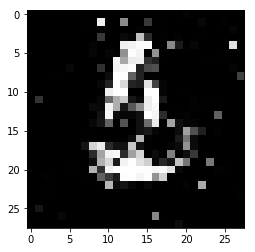

Number batches 78
48(0/78) D: 0.3421, G: 2.4960
48(1/78) D: 0.3363, G: 1.9289
48(2/78) D: 0.3631, G: 1.3917
48(3/78) D: 0.3430, G: 2.4803
48(4/78) D: 0.3583, G: 2.1036
48(5/78) D: 0.3350, G: 2.0035
48(6/78) D: 0.3293, G: 2.1454
48(7/78) D: 0.3235, G: 2.5792
48(8/78) D: 0.4485, G: 1.6523
48(9/78) D: 0.4475, G: 2.2328
48(10/78) D: 0.3630, G: 2.1406
48(11/78) D: 0.2746, G: 1.8892
48(12/78) D: 0.4002, G: 2.3345
48(13/78) D: 0.3467, G: 1.6143
48(14/78) D: 0.3481, G: 1.7429
48(15/78) D: 0.3134, G: 2.5700
48(16/78) D: 0.3192, G: 1.8617
48(17/78) D: 0.3359, G: 1.6749
48(18/78) D: 0.4105, G: 2.5623
48(19/78) D: 0.3265, G: 1.6338
48(20/78) D: 0.2840, G: 2.0977
48(21/78) D: 0.3556, G: 1.9844
48(22/78) D: 0.2998, G: 2.1329
48(23/78) D: 0.3055, G: 1.8291
48(24/78) D: 0.3605, G: 2.2913
48(25/78) D: 0.3526, G: 1.7595
48(26/78) D: 0.3177, G: 2.2875
48(27/78) D: 0.3505, G: 2.0211
48(28/78) D: 0.3510, G: 2.1785
48(29/78) D: 0.3316, G: 2.0678
48(30/78) D: 0.3846, G: 1.4026
48(31/78) D: 0.4046, G: 2.9107


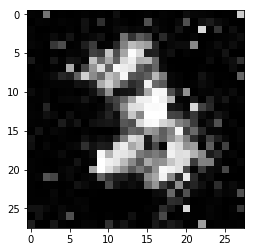

Number batches 78
49(0/78) D: 0.3540, G: 2.3264
49(1/78) D: 0.4061, G: 1.5843
49(2/78) D: 0.4003, G: 1.7037
49(3/78) D: 0.3496, G: 2.0563
49(4/78) D: 0.3709, G: 2.0919
49(5/78) D: 0.2488, G: 2.2972
49(6/78) D: 0.3291, G: 1.9333
49(7/78) D: 0.3834, G: 2.0167
49(8/78) D: 0.4424, G: 1.4849
49(9/78) D: 0.3792, G: 2.3498
49(10/78) D: 0.3361, G: 1.8974
49(11/78) D: 0.3199, G: 2.0238
49(12/78) D: 0.3173, G: 2.3513
49(13/78) D: 0.3063, G: 2.0233
49(14/78) D: 0.3276, G: 1.9306
49(15/78) D: 0.3510, G: 2.8208
49(16/78) D: 0.3078, G: 1.9924
49(17/78) D: 0.2867, G: 1.8054
49(18/78) D: 0.3342, G: 3.0134
49(19/78) D: 0.4212, G: 1.6498
49(20/78) D: 0.3458, G: 2.2705
49(21/78) D: 0.3525, G: 2.0827
49(22/78) D: 0.3058, G: 1.9740
49(23/78) D: 0.3092, G: 1.8913
49(24/78) D: 0.3838, G: 1.6375
49(25/78) D: 0.3914, G: 2.0400
49(26/78) D: 0.3678, G: 2.0400
49(27/78) D: 0.3421, G: 2.5520
49(28/78) D: 0.3403, G: 1.6151
49(29/78) D: 0.3547, G: 2.1985
49(30/78) D: 0.4116, G: 2.1467
49(31/78) D: 0.3698, G: 1.9690


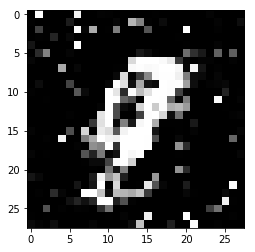

Number batches 78
50(0/78) D: 0.3626, G: 2.0699
50(1/78) D: 0.4120, G: 1.6323
50(2/78) D: 0.3771, G: 1.9551
50(3/78) D: 0.3828, G: 2.3542
50(4/78) D: 0.3930, G: 1.9722
50(5/78) D: 0.4423, G: 2.0411
50(6/78) D: 0.3486, G: 1.9075
50(7/78) D: 0.3601, G: 1.7295
50(8/78) D: 0.5085, G: 1.9797
50(9/78) D: 0.4093, G: 1.8835
50(10/78) D: 0.3550, G: 2.2995
50(11/78) D: 0.3758, G: 2.1956
50(12/78) D: 0.3911, G: 1.7680
50(13/78) D: 0.3246, G: 2.3543
50(14/78) D: 0.3659, G: 1.7290
50(15/78) D: 0.3733, G: 2.5467
50(16/78) D: 0.3749, G: 1.7273
50(17/78) D: 0.3663, G: 2.5082
50(18/78) D: 0.3815, G: 1.7735
50(19/78) D: 0.3965, G: 2.3891
50(20/78) D: 0.3519, G: 2.2721
50(21/78) D: 0.3536, G: 1.7412
50(22/78) D: 0.3935, G: 2.1200
50(23/78) D: 0.3765, G: 1.9603
50(24/78) D: 0.4231, G: 1.8849
50(25/78) D: 0.3890, G: 2.0569
50(26/78) D: 0.4036, G: 1.8413
50(27/78) D: 0.3827, G: 2.6908
50(28/78) D: 0.3921, G: 1.6042
50(29/78) D: 0.4049, G: 2.3099
50(30/78) D: 0.3478, G: 2.0924
50(31/78) D: 0.4088, G: 1.8929


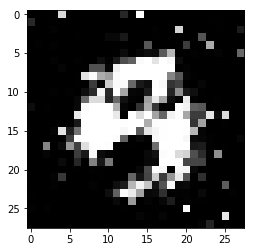

Number batches 78
51(0/78) D: 0.3399, G: 1.8269
51(1/78) D: 0.4127, G: 1.7744
51(2/78) D: 0.4002, G: 2.3260
51(3/78) D: 0.4653, G: 1.7371
51(4/78) D: 0.4285, G: 1.4417
51(5/78) D: 0.4211, G: 2.3214
51(6/78) D: 0.4158, G: 2.2757
51(7/78) D: 0.4291, G: 1.4159
51(8/78) D: 0.4696, G: 2.0499
51(9/78) D: 0.4220, G: 2.0530
51(10/78) D: 0.3766, G: 1.6754
51(11/78) D: 0.3656, G: 2.4832
51(12/78) D: 0.3862, G: 1.7383
51(13/78) D: 0.3930, G: 2.2675
51(14/78) D: 0.4170, G: 2.2408
51(15/78) D: 0.4140, G: 1.6718
51(16/78) D: 0.4273, G: 2.2254
51(17/78) D: 0.3723, G: 1.7020
51(18/78) D: 0.3770, G: 2.4775
51(19/78) D: 0.3404, G: 1.8141
51(20/78) D: 0.3446, G: 1.8838
51(21/78) D: 0.3501, G: 2.7583
51(22/78) D: 0.4000, G: 2.0001
51(23/78) D: 0.3956, G: 1.3420
51(24/78) D: 0.4789, G: 2.4319
51(25/78) D: 0.4400, G: 1.5123
51(26/78) D: 0.4014, G: 1.9378
51(27/78) D: 0.3241, G: 1.9337
51(28/78) D: 0.4018, G: 2.1568
51(29/78) D: 0.3526, G: 1.8808
51(30/78) D: 0.4250, G: 1.7339
51(31/78) D: 0.4199, G: 2.5710


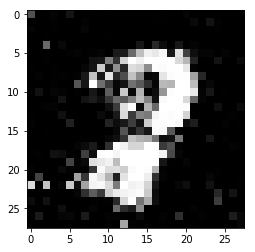

Number batches 78
52(0/78) D: 0.3416, G: 1.8473
52(1/78) D: 0.3782, G: 2.2241
52(2/78) D: 0.4810, G: 1.7608
52(3/78) D: 0.3663, G: 1.8989
52(4/78) D: 0.3841, G: 1.7706
52(5/78) D: 0.3814, G: 1.8828
52(6/78) D: 0.4175, G: 2.0028
52(7/78) D: 0.4227, G: 1.9000
52(8/78) D: 0.5059, G: 1.5631
52(9/78) D: 0.4941, G: 1.6329
52(10/78) D: 0.4271, G: 2.0091
52(11/78) D: 0.3804, G: 1.7363
52(12/78) D: 0.3817, G: 1.8119
52(13/78) D: 0.3875, G: 2.0180
52(14/78) D: 0.3924, G: 1.9326
52(15/78) D: 0.4612, G: 1.3750
52(16/78) D: 0.4300, G: 2.5342
52(17/78) D: 0.4271, G: 1.5900
52(18/78) D: 0.4049, G: 2.3796
52(19/78) D: 0.4178, G: 1.4819
52(20/78) D: 0.3358, G: 1.9800
52(21/78) D: 0.3419, G: 2.1239
52(22/78) D: 0.3347, G: 1.9156
52(23/78) D: 0.3949, G: 1.7574
52(24/78) D: 0.4224, G: 1.7137
52(25/78) D: 0.4327, G: 1.9207
52(26/78) D: 0.3174, G: 1.8788
52(27/78) D: 0.3746, G: 1.8851
52(28/78) D: 0.3730, G: 2.1638
52(29/78) D: 0.3066, G: 2.2464
52(30/78) D: 0.3424, G: 1.5711
52(31/78) D: 0.3817, G: 2.2796


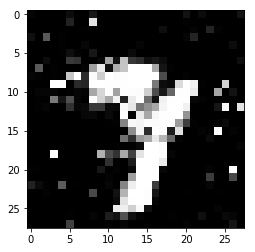

Number batches 78
53(0/78) D: 0.3561, G: 1.7107
53(1/78) D: 0.4398, G: 2.5776
53(2/78) D: 0.3845, G: 1.4990
53(3/78) D: 0.3597, G: 2.1782
53(4/78) D: 0.3773, G: 2.0979
53(5/78) D: 0.3773, G: 1.7663
53(6/78) D: 0.4632, G: 1.8192
53(7/78) D: 0.3604, G: 2.3759
53(8/78) D: 0.5680, G: 1.1541
53(9/78) D: 0.4857, G: 1.7694
53(10/78) D: 0.4724, G: 1.7992
53(11/78) D: 0.4314, G: 2.0867
53(12/78) D: 0.4017, G: 1.8952
53(13/78) D: 0.4147, G: 1.3604
53(14/78) D: 0.4080, G: 1.6020
53(15/78) D: 0.4129, G: 1.6012
53(16/78) D: 0.3845, G: 2.1676
53(17/78) D: 0.3461, G: 2.0877
53(18/78) D: 0.3862, G: 1.7534
53(19/78) D: 0.3819, G: 2.3762
53(20/78) D: 0.4013, G: 1.5736
53(21/78) D: 0.4598, G: 1.7807
53(22/78) D: 0.4585, G: 1.6062
53(23/78) D: 0.4734, G: 1.8639
53(24/78) D: 0.5054, G: 1.5731
53(25/78) D: 0.4945, G: 1.6623
53(26/78) D: 0.4051, G: 1.9978
53(27/78) D: 0.3867, G: 1.8641
53(28/78) D: 0.3678, G: 1.6851
53(29/78) D: 0.3841, G: 2.0259
53(30/78) D: 0.4455, G: 1.7356
53(31/78) D: 0.4637, G: 1.6894


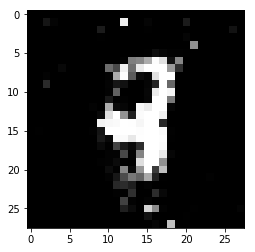

Number batches 78
54(0/78) D: 0.3227, G: 2.2225
54(1/78) D: 0.3168, G: 1.8025
54(2/78) D: 0.3296, G: 2.0378
54(3/78) D: 0.3429, G: 2.2871
54(4/78) D: 0.4229, G: 1.9014
54(5/78) D: 0.3799, G: 2.5732
54(6/78) D: 0.3832, G: 1.8736
54(7/78) D: 0.3027, G: 2.0031
54(8/78) D: 0.4355, G: 1.4631
54(9/78) D: 0.4573, G: 2.0067
54(10/78) D: 0.4073, G: 1.7431
54(11/78) D: 0.3777, G: 1.9408
54(12/78) D: 0.3585, G: 2.0428
54(13/78) D: 0.3746, G: 1.6940
54(14/78) D: 0.3860, G: 2.5008
54(15/78) D: 0.3477, G: 2.0372
54(16/78) D: 0.3420, G: 2.0137
54(17/78) D: 0.3424, G: 2.2595
54(18/78) D: 0.3795, G: 1.7728
54(19/78) D: 0.3554, G: 2.4070
54(20/78) D: 0.3600, G: 2.3760
54(21/78) D: 0.3690, G: 1.6156
54(22/78) D: 0.3981, G: 2.2147
54(23/78) D: 0.3942, G: 2.1309
54(24/78) D: 0.3865, G: 2.3398
54(25/78) D: 0.5008, G: 1.3657
54(26/78) D: 0.4980, G: 2.8523
54(27/78) D: 0.4983, G: 1.3208
54(28/78) D: 0.4424, G: 2.3415
54(29/78) D: 0.3176, G: 2.0814
54(30/78) D: 0.4568, G: 1.5159
54(31/78) D: 0.4249, G: 1.8273


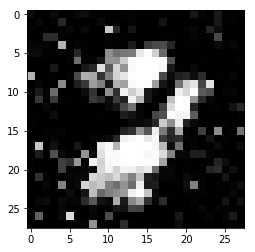

Number batches 78
55(0/78) D: 0.3348, G: 1.8457
55(1/78) D: 0.3430, G: 1.8116
55(2/78) D: 0.4563, G: 2.1609
55(3/78) D: 0.3125, G: 2.2097
55(4/78) D: 0.3598, G: 2.0161
55(5/78) D: 0.3654, G: 2.2131
55(6/78) D: 0.3461, G: 2.0686
55(7/78) D: 0.3662, G: 1.7384
55(8/78) D: 0.4479, G: 1.7208
55(9/78) D: 0.4805, G: 2.4597
55(10/78) D: 0.4258, G: 1.6812
55(11/78) D: 0.3211, G: 2.1103
55(12/78) D: 0.4266, G: 1.8393
55(13/78) D: 0.3981, G: 1.3864
55(14/78) D: 0.4602, G: 2.4733
55(15/78) D: 0.3619, G: 1.9039
55(16/78) D: 0.4058, G: 1.6267
55(17/78) D: 0.3782, G: 1.9218
55(18/78) D: 0.3091, G: 1.9503
55(19/78) D: 0.3693, G: 1.6526
55(20/78) D: 0.3497, G: 2.1673
55(21/78) D: 0.3505, G: 2.2288
55(22/78) D: 0.3749, G: 1.9051
55(23/78) D: 0.3796, G: 1.9667
55(24/78) D: 0.4435, G: 1.8512
55(25/78) D: 0.4447, G: 1.6511
55(26/78) D: 0.4000, G: 2.5928
55(27/78) D: 0.4221, G: 1.8353
55(28/78) D: 0.4125, G: 1.9528
55(29/78) D: 0.3702, G: 1.8859
55(30/78) D: 0.4272, G: 1.9865
55(31/78) D: 0.3620, G: 1.9256


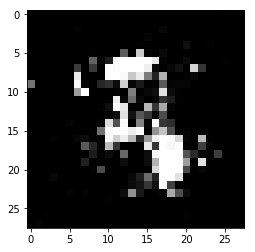

Number batches 78
56(0/78) D: 0.3872, G: 1.8080
56(1/78) D: 0.3834, G: 1.5544
56(2/78) D: 0.4426, G: 1.9113
56(3/78) D: 0.3552, G: 2.1293
56(4/78) D: 0.4367, G: 1.4245
56(5/78) D: 0.3909, G: 1.9010
56(6/78) D: 0.3518, G: 2.2479
56(7/78) D: 0.3435, G: 1.5660
56(8/78) D: 0.3905, G: 1.4865
56(9/78) D: 0.4599, G: 1.4919
56(10/78) D: 0.4019, G: 2.2673
56(11/78) D: 0.3401, G: 1.9011
56(12/78) D: 0.3525, G: 1.4021
56(13/78) D: 0.3465, G: 2.1068
56(14/78) D: 0.3734, G: 1.6539
56(15/78) D: 0.3990, G: 1.7017
56(16/78) D: 0.3346, G: 1.8593
56(17/78) D: 0.3711, G: 1.6751
56(18/78) D: 0.3640, G: 1.9613
56(19/78) D: 0.3959, G: 1.8351
56(20/78) D: 0.3554, G: 1.7918
56(21/78) D: 0.3588, G: 1.9003
56(22/78) D: 0.3505, G: 1.8836
56(23/78) D: 0.3624, G: 2.0268
56(24/78) D: 0.4530, G: 1.5113
56(25/78) D: 0.4112, G: 1.9638
56(26/78) D: 0.4131, G: 1.9901
56(27/78) D: 0.4095, G: 1.7086
56(28/78) D: 0.4420, G: 1.7877
56(29/78) D: 0.3247, G: 1.8477
56(30/78) D: 0.4319, G: 1.9725
56(31/78) D: 0.4372, G: 1.5969


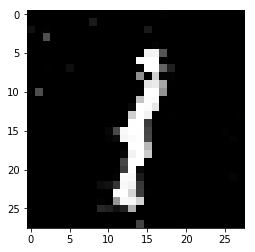

Number batches 78
57(0/78) D: 0.3282, G: 1.7467
57(1/78) D: 0.4040, G: 1.6309
57(2/78) D: 0.4027, G: 1.6026
57(3/78) D: 0.3438, G: 1.8781
57(4/78) D: 0.3592, G: 1.6898
57(5/78) D: 0.3621, G: 1.6846
57(6/78) D: 0.3844, G: 1.9075
57(7/78) D: 0.3670, G: 2.2998
57(8/78) D: 0.5117, G: 0.8107
57(9/78) D: 0.5551, G: 2.0420
57(10/78) D: 0.4152, G: 2.0811
57(11/78) D: 0.3622, G: 1.6789
57(12/78) D: 0.4160, G: 1.5387
57(13/78) D: 0.3494, G: 1.5477
57(14/78) D: 0.3568, G: 1.8849
57(15/78) D: 0.4094, G: 1.7464
57(16/78) D: 0.3759, G: 1.9575
57(17/78) D: 0.3923, G: 1.6905
57(18/78) D: 0.3561, G: 1.7253
57(19/78) D: 0.3190, G: 1.8710
57(20/78) D: 0.3271, G: 1.8357
57(21/78) D: 0.4043, G: 1.7734
57(22/78) D: 0.3607, G: 2.0021
57(23/78) D: 0.3376, G: 1.6251
57(24/78) D: 0.4313, G: 1.5471
57(25/78) D: 0.4573, G: 2.2666
57(26/78) D: 0.4268, G: 1.6738
57(27/78) D: 0.3614, G: 1.5205
57(28/78) D: 0.3782, G: 1.6651
57(29/78) D: 0.3568, G: 2.4777
57(30/78) D: 0.3674, G: 1.7519
57(31/78) D: 0.3679, G: 1.9222


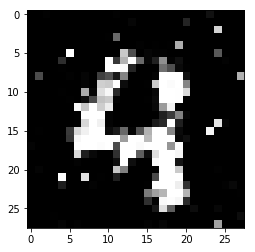

Number batches 78
58(0/78) D: 0.4284, G: 2.1901
58(1/78) D: 0.4093, G: 1.5473
58(2/78) D: 0.4391, G: 1.7051
58(3/78) D: 0.4110, G: 2.1662
58(4/78) D: 0.5119, G: 1.5295
58(5/78) D: 0.4757, G: 2.2753
58(6/78) D: 0.4524, G: 1.7184
58(7/78) D: 0.4249, G: 1.6986
58(8/78) D: 0.4726, G: 1.3998
58(9/78) D: 0.5034, G: 1.6977
58(10/78) D: 0.4478, G: 1.9191
58(11/78) D: 0.4251, G: 1.8783
58(12/78) D: 0.4425, G: 1.5124
58(13/78) D: 0.4626, G: 1.8458
58(14/78) D: 0.4102, G: 1.7172
58(15/78) D: 0.4364, G: 1.5951
58(16/78) D: 0.4264, G: 1.6283
58(17/78) D: 0.3847, G: 2.0534
58(18/78) D: 0.4848, G: 1.8869
58(19/78) D: 0.4850, G: 1.4486
58(20/78) D: 0.4715, G: 1.6324
58(21/78) D: 0.3796, G: 1.5933
58(22/78) D: 0.4310, G: 1.7528
58(23/78) D: 0.4668, G: 1.7359
58(24/78) D: 0.4935, G: 1.3072
58(25/78) D: 0.4442, G: 1.6571
58(26/78) D: 0.4193, G: 1.9887
58(27/78) D: 0.3809, G: 1.4601
58(28/78) D: 0.4199, G: 1.7659
58(29/78) D: 0.4553, G: 1.8697
58(30/78) D: 0.4748, G: 1.6326
58(31/78) D: 0.3836, G: 1.3758


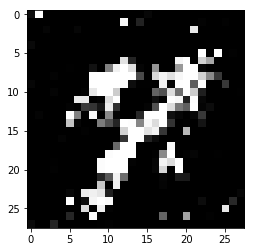

Number batches 78
59(0/78) D: 0.4157, G: 1.6130
59(1/78) D: 0.3883, G: 1.7671
59(2/78) D: 0.3523, G: 1.8481
59(3/78) D: 0.3830, G: 1.7329
59(4/78) D: 0.4413, G: 1.7665
59(5/78) D: 0.4145, G: 2.1565
59(6/78) D: 0.4141, G: 1.2859
59(7/78) D: 0.3987, G: 2.0306
59(8/78) D: 0.5404, G: 1.4062
59(9/78) D: 0.4232, G: 1.4361
59(10/78) D: 0.4105, G: 1.8980
59(11/78) D: 0.3407, G: 2.1737
59(12/78) D: 0.4475, G: 1.6147
59(13/78) D: 0.4046, G: 1.6855
59(14/78) D: 0.4052, G: 1.9894
59(15/78) D: 0.3977, G: 1.7406
59(16/78) D: 0.4429, G: 1.4869
59(17/78) D: 0.4129, G: 1.9986
59(18/78) D: 0.3705, G: 1.6921
59(19/78) D: 0.3394, G: 2.2261
59(20/78) D: 0.4259, G: 1.3038
59(21/78) D: 0.4265, G: 1.8336
59(22/78) D: 0.4040, G: 1.9613
59(23/78) D: 0.4192, G: 1.4422
59(24/78) D: 0.4669, G: 1.9653
59(25/78) D: 0.5084, G: 1.5853
59(26/78) D: 0.3951, G: 1.9932
59(27/78) D: 0.3867, G: 1.6537
59(28/78) D: 0.4221, G: 1.8701
59(29/78) D: 0.3636, G: 2.0557
59(30/78) D: 0.4521, G: 1.3215
59(31/78) D: 0.5440, G: 2.5027


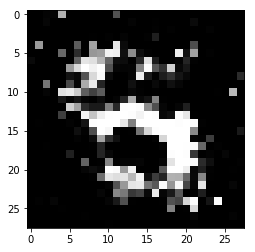

Number batches 78
60(0/78) D: 0.4277, G: 1.8527
60(1/78) D: 0.3776, G: 1.7977
60(2/78) D: 0.4317, G: 1.6223
60(3/78) D: 0.4004, G: 1.7533
60(4/78) D: 0.4776, G: 1.7256
60(5/78) D: 0.3991, G: 1.8252
60(6/78) D: 0.4275, G: 1.7976
60(7/78) D: 0.3946, G: 2.0393
60(8/78) D: 0.5078, G: 1.2355
60(9/78) D: 0.4880, G: 1.5025
60(10/78) D: 0.4665, G: 2.0910
60(11/78) D: 0.4147, G: 1.4040
60(12/78) D: 0.4426, G: 1.4210
60(13/78) D: 0.4391, G: 1.9628
60(14/78) D: 0.3884, G: 1.5463
60(15/78) D: 0.3928, G: 1.7313
60(16/78) D: 0.4503, G: 2.0235
60(17/78) D: 0.3949, G: 1.6034
60(18/78) D: 0.4190, G: 1.8241
60(19/78) D: 0.4219, G: 1.7146
60(20/78) D: 0.4456, G: 1.6114
60(21/78) D: 0.4559, G: 1.7125
60(22/78) D: 0.4192, G: 1.7176
60(23/78) D: 0.4245, G: 1.5725
60(24/78) D: 0.4743, G: 1.7240
60(25/78) D: 0.3522, G: 1.3587
60(26/78) D: 0.4580, G: 1.8621
60(27/78) D: 0.4627, G: 1.5530
60(28/78) D: 0.4497, G: 1.6904
60(29/78) D: 0.3847, G: 1.7887
60(30/78) D: 0.4311, G: 1.4850
60(31/78) D: 0.4561, G: 2.0935


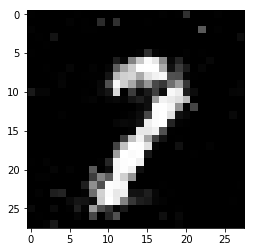

Number batches 78
61(0/78) D: 0.4148, G: 1.9299
61(1/78) D: 0.4225, G: 1.9791
61(2/78) D: 0.4123, G: 1.5795
61(3/78) D: 0.4064, G: 1.5018
61(4/78) D: 0.4561, G: 2.3920
61(5/78) D: 0.4508, G: 1.6159
61(6/78) D: 0.3580, G: 1.7365
61(7/78) D: 0.3742, G: 1.9958
61(8/78) D: 0.4295, G: 1.2005
61(9/78) D: 0.5543, G: 1.9633
61(10/78) D: 0.4302, G: 2.0732
61(11/78) D: 0.4009, G: 1.4967
61(12/78) D: 0.4099, G: 2.0385
61(13/78) D: 0.3544, G: 1.9316
61(14/78) D: 0.3541, G: 1.5833
61(15/78) D: 0.3838, G: 1.9272
61(16/78) D: 0.3409, G: 2.0642
61(17/78) D: 0.2985, G: 2.0400
61(18/78) D: 0.3952, G: 1.8233
61(19/78) D: 0.4033, G: 1.6070
61(20/78) D: 0.3990, G: 1.8724
61(21/78) D: 0.4117, G: 1.6346
61(22/78) D: 0.4120, G: 1.7034
61(23/78) D: 0.4267, G: 1.9876
61(24/78) D: 0.4076, G: 1.5065
61(25/78) D: 0.4557, G: 1.8935
61(26/78) D: 0.4332, G: 1.9337
61(27/78) D: 0.3823, G: 1.5685
61(28/78) D: 0.3766, G: 1.6521
61(29/78) D: 0.4029, G: 2.1335
61(30/78) D: 0.4278, G: 1.3706
61(31/78) D: 0.4770, G: 2.2492


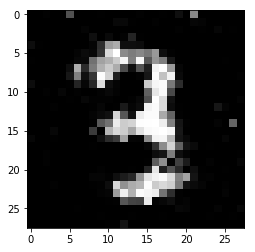

Number batches 78
62(0/78) D: 0.4310, G: 2.0804
62(1/78) D: 0.4482, G: 1.7983
62(2/78) D: 0.4372, G: 1.7654
62(3/78) D: 0.4219, G: 1.7875
62(4/78) D: 0.4278, G: 1.6266
62(5/78) D: 0.4195, G: 1.8049
62(6/78) D: 0.4146, G: 1.5266
62(7/78) D: 0.4300, G: 1.9501
62(8/78) D: 0.5025, G: 1.2594
62(9/78) D: 0.4636, G: 1.6214
62(10/78) D: 0.4390, G: 1.9576
62(11/78) D: 0.4362, G: 1.4196
62(12/78) D: 0.3651, G: 1.9379
62(13/78) D: 0.4655, G: 1.8977
62(14/78) D: 0.4187, G: 1.6578
62(15/78) D: 0.4826, G: 1.7710
62(16/78) D: 0.4357, G: 1.3425
62(17/78) D: 0.3799, G: 2.0764
62(18/78) D: 0.4517, G: 1.6803
62(19/78) D: 0.4197, G: 1.7005
62(20/78) D: 0.3905, G: 1.9359
62(21/78) D: 0.4247, G: 1.6366
62(22/78) D: 0.4619, G: 1.7956
62(23/78) D: 0.4031, G: 1.7016
62(24/78) D: 0.4265, G: 1.1977
62(25/78) D: 0.4739, G: 1.5428
62(26/78) D: 0.4267, G: 1.5844
62(27/78) D: 0.4459, G: 1.9104
62(28/78) D: 0.4589, G: 1.7734
62(29/78) D: 0.4064, G: 1.6108
62(30/78) D: 0.4461, G: 1.7698
62(31/78) D: 0.3797, G: 1.5701


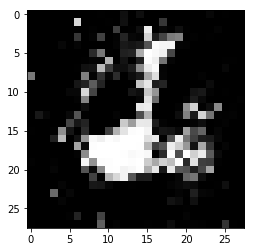

Number batches 78
63(0/78) D: 0.3957, G: 1.6850
63(1/78) D: 0.4815, G: 1.9467
63(2/78) D: 0.4392, G: 1.6720
63(3/78) D: 0.4246, G: 1.8298
63(4/78) D: 0.4166, G: 1.8890
63(5/78) D: 0.4372, G: 1.8187
63(6/78) D: 0.4068, G: 1.9662
63(7/78) D: 0.3445, G: 2.0357
63(8/78) D: 0.5023, G: 1.1579
63(9/78) D: 0.5179, G: 2.2610
63(10/78) D: 0.4578, G: 1.7338
63(11/78) D: 0.4267, G: 1.9541
63(12/78) D: 0.4589, G: 1.7525
63(13/78) D: 0.4213, G: 1.4233
63(14/78) D: 0.4242, G: 2.4094
63(15/78) D: 0.5071, G: 1.2384
63(16/78) D: 0.4621, G: 1.8677
63(17/78) D: 0.4136, G: 2.2946
63(18/78) D: 0.3964, G: 1.4589
63(19/78) D: 0.3891, G: 2.1167
63(20/78) D: 0.4602, G: 1.6904
63(21/78) D: 0.4585, G: 1.4730
63(22/78) D: 0.4272, G: 1.6554
63(23/78) D: 0.4026, G: 2.1130
63(24/78) D: 0.4783, G: 1.3396
63(25/78) D: 0.5256, G: 1.8510
63(26/78) D: 0.4669, G: 1.8870
63(27/78) D: 0.5104, G: 1.5628
63(28/78) D: 0.4398, G: 1.8163
63(29/78) D: 0.4213, G: 1.7979
63(30/78) D: 0.5698, G: 1.3013
63(31/78) D: 0.5107, G: 1.6653


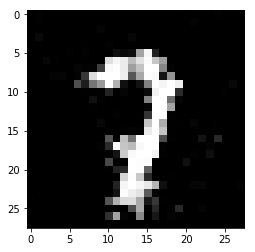

Number batches 78
64(0/78) D: 0.4445, G: 1.3707
64(1/78) D: 0.4665, G: 1.7020
64(2/78) D: 0.4660, G: 1.3601
64(3/78) D: 0.4817, G: 1.6989
64(4/78) D: 0.5161, G: 1.3071
64(5/78) D: 0.4176, G: 1.4996
64(6/78) D: 0.4566, G: 2.1650
64(7/78) D: 0.4258, G: 1.5137
64(8/78) D: 0.5114, G: 1.1191
64(9/78) D: 0.5448, G: 1.7068
64(10/78) D: 0.3905, G: 1.7658
64(11/78) D: 0.4738, G: 1.2580
64(12/78) D: 0.4353, G: 1.5045
64(13/78) D: 0.4316, G: 1.7263
64(14/78) D: 0.4490, G: 1.5298
64(15/78) D: 0.4477, G: 1.6192
64(16/78) D: 0.4404, G: 1.6763
64(17/78) D: 0.5196, G: 1.3140
64(18/78) D: 0.4206, G: 1.6987
64(19/78) D: 0.4177, G: 1.5900
64(20/78) D: 0.4538, G: 1.4989
64(21/78) D: 0.4850, G: 1.7829
64(22/78) D: 0.4786, G: 1.5163
64(23/78) D: 0.4537, G: 1.3748
64(24/78) D: 0.4737, G: 1.6643
64(25/78) D: 0.4120, G: 1.4388
64(26/78) D: 0.4448, G: 1.6462
64(27/78) D: 0.4473, G: 1.8932
64(28/78) D: 0.5085, G: 1.3345
64(29/78) D: 0.4055, G: 1.7067
64(30/78) D: 0.4525, G: 1.3938
64(31/78) D: 0.4514, G: 2.0780


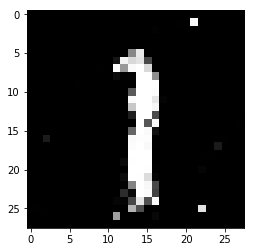

Number batches 78
65(0/78) D: 0.3634, G: 1.3319
65(1/78) D: 0.4297, G: 1.9120
65(2/78) D: 0.4088, G: 1.5837
65(3/78) D: 0.4062, G: 1.5746
65(4/78) D: 0.4213, G: 1.8561
65(5/78) D: 0.4263, G: 1.5750
65(6/78) D: 0.3436, G: 1.8811
65(7/78) D: 0.3938, G: 1.7092
65(8/78) D: 0.4631, G: 1.6305
65(9/78) D: 0.5024, G: 1.5272
65(10/78) D: 0.4354, G: 1.8301
65(11/78) D: 0.3863, G: 1.6186
65(12/78) D: 0.4689, G: 1.9311
65(13/78) D: 0.4208, G: 1.4172
65(14/78) D: 0.4410, G: 1.6381
65(15/78) D: 0.4482, G: 1.8008
65(16/78) D: 0.4145, G: 1.5877
65(17/78) D: 0.4647, G: 1.9057
65(18/78) D: 0.4023, G: 1.5508
65(19/78) D: 0.3538, G: 1.7577
65(20/78) D: 0.4251, G: 1.6671
65(21/78) D: 0.4503, G: 1.5030
65(22/78) D: 0.4443, G: 1.6096
65(23/78) D: 0.4422, G: 1.8808
65(24/78) D: 0.5070, G: 1.5105
65(25/78) D: 0.4025, G: 1.4646
65(26/78) D: 0.4291, G: 1.9027
65(27/78) D: 0.4138, G: 1.5582
65(28/78) D: 0.4728, G: 1.6818
65(29/78) D: 0.4708, G: 1.5913
65(30/78) D: 0.4382, G: 1.8456
65(31/78) D: 0.4203, G: 1.6153


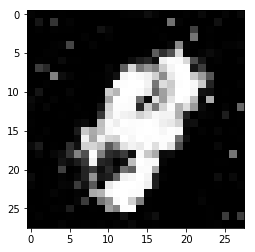

Number batches 78
66(0/78) D: 0.4071, G: 1.2630
66(1/78) D: 0.4608, G: 1.9071
66(2/78) D: 0.4318, G: 1.8196
66(3/78) D: 0.4323, G: 1.3973
66(4/78) D: 0.4147, G: 1.7432
66(5/78) D: 0.4605, G: 2.0379
66(6/78) D: 0.3959, G: 1.8220
66(7/78) D: 0.4104, G: 1.9277
66(8/78) D: 0.4832, G: 1.1131
66(9/78) D: 0.5387, G: 1.8887
66(10/78) D: 0.4859, G: 2.0257
66(11/78) D: 0.3850, G: 1.5985
66(12/78) D: 0.4643, G: 1.6002
66(13/78) D: 0.4394, G: 1.5715
66(14/78) D: 0.4364, G: 2.0847
66(15/78) D: 0.4847, G: 1.3199
66(16/78) D: 0.5212, G: 1.8380
66(17/78) D: 0.3933, G: 1.6882
66(18/78) D: 0.4117, G: 2.1475
66(19/78) D: 0.3994, G: 1.7785
66(20/78) D: 0.4631, G: 1.4671
66(21/78) D: 0.4967, G: 1.6743
66(22/78) D: 0.5084, G: 1.4561
66(23/78) D: 0.4030, G: 1.6344
66(24/78) D: 0.4661, G: 1.6292
66(25/78) D: 0.4095, G: 1.3591
66(26/78) D: 0.4724, G: 2.0606
66(27/78) D: 0.3963, G: 1.6396
66(28/78) D: 0.3913, G: 1.6962
66(29/78) D: 0.4765, G: 1.6779
66(30/78) D: 0.4959, G: 1.8419
66(31/78) D: 0.4494, G: 1.3734


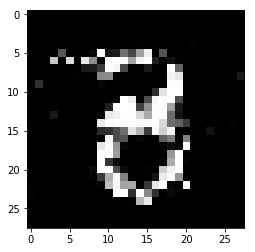

Number batches 78
67(0/78) D: 0.4664, G: 1.4706
67(1/78) D: 0.4795, G: 1.4994
67(2/78) D: 0.4643, G: 1.4447
67(3/78) D: 0.4914, G: 1.8571
67(4/78) D: 0.4465, G: 1.5792
67(5/78) D: 0.4242, G: 1.5108
67(6/78) D: 0.3797, G: 1.9267
67(7/78) D: 0.4308, G: 1.9177
67(8/78) D: 0.4956, G: 1.1241
67(9/78) D: 0.6032, G: 1.8160
67(10/78) D: 0.4544, G: 1.6799
67(11/78) D: 0.4322, G: 1.2850
67(12/78) D: 0.4833, G: 1.6681
67(13/78) D: 0.4561, G: 1.4560
67(14/78) D: 0.4431, G: 1.5328
67(15/78) D: 0.4684, G: 1.4787
67(16/78) D: 0.4226, G: 1.6433
67(17/78) D: 0.4184, G: 1.5530
67(18/78) D: 0.4054, G: 1.4975
67(19/78) D: 0.3919, G: 1.8057
67(20/78) D: 0.4655, G: 1.2529
67(21/78) D: 0.4805, G: 1.7827
67(22/78) D: 0.4766, G: 1.5650
67(23/78) D: 0.4084, G: 1.6719
67(24/78) D: 0.4211, G: 1.7898
67(25/78) D: 0.4093, G: 1.3983
67(26/78) D: 0.3783, G: 1.8244
67(27/78) D: 0.4201, G: 1.4871
67(28/78) D: 0.4092, G: 1.7975
67(29/78) D: 0.4587, G: 1.5088
67(30/78) D: 0.4279, G: 1.8940
67(31/78) D: 0.4152, G: 1.6386


KeyboardInterrupt: 

In [18]:
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        # A training iteration
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Contains the real and fake images.
        X = np.concatenate([generated_images, real_images])
        
        # Labels if the sample is real (1) or not real (0). 
        y = np.concatenate([np.zeros(generated_images.shape[0]), np.ones(real_images.shape[0])])

        # Train the discriminator using the generated images and the real images.
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))

        # Get the g_loss
        g_loss = dg.train_on_batch(noise, np.ones(noise.shape[0]))
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))